# ** RFM Customer Segmentation & Cohort Analysis Project **  

## Determines

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.


# 1. Data Cleaning & Exploratory Data Analysis

## Import Modules, Load Data & Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.shape # Shape of data

(541909, 8)

In [4]:
df.head(5) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()/ len(df) * 100 

InvoiceNo      0.00
StockCode      0.00
Description    0.27
Quantity       0.00
InvoiceDate    0.00
UnitPrice      0.00
CustomerID    24.93
Country        0.00
dtype: float64

Description and CustomerID columns have missing values.

In [7]:
df.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


Quantity and UnitPrice columns have negative values. 

### i. Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.

In [8]:
df["InvoiceNo"].value_counts(dropna=False)

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
563851        1
563820        1
C539277       1
563742        1
560199        1
Name: InvoiceNo, Length: 25900, dtype: int64

In [9]:
df["Quantity"].value_counts(dropna=False)

 1       148227
 2        81829
 12       61063
 6        40868
 4        38484
          ...  
 1287         1
-5368         1
 267          1
-244          1
 512          1
Name: Quantity, Length: 722, dtype: int64

In [10]:
df["UnitPrice"].value_counts(dropna=False)

1.25       50496
1.65       38181
0.85       28497
2.95       27768
0.42       24533
           ...  
4575.64        1
125.96         1
147.13         1
3060.60        1
244.51         1
Name: UnitPrice, Length: 1630, dtype: int64

We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out.

In [11]:
df_three = df[["InvoiceNo", "Quantity", "UnitPrice"]] # Created a new dataframe for InvoiceNo, Quantity, UnitPrice columns
df_three[df_three["Quantity"] < 0] # Quantity lower than 0

,InvoiceNo,Quantity,UnitPrice
141,C536379,-1,27.50
154,C536383,-1,4.65
235,C536391,-12,1.65
236,C536391,-24,0.29
237,C536391,-24,0.29
...,...,...,...
540449,C581490,-11,0.83
541541,C581499,-1,224.69
541715,C581568,-5,10.95
541716,C581569,-1,1.25


In [12]:
df_three[(df_three["Quantity"] < 0) & (df_three["InvoiceNo"].str.contains("C"))] # InvoiceNo startswith C and Quantity lower than 0

,InvoiceNo,Quantity,UnitPrice
141,C536379,-1,27.50
154,C536383,-1,4.65
235,C536391,-12,1.65
236,C536391,-24,0.29
237,C536391,-24,0.29
...,...,...,...
540449,C581490,-11,0.83
541541,C581499,-1,224.69
541715,C581568,-5,10.95
541716,C581569,-1,1.25


In [13]:
df_three[(df_three["Quantity"] < 0) & (df_three["InvoiceNo"].str.contains("C") == False)]

,InvoiceNo,Quantity,UnitPrice


There are 9192 rows that Quantity is lower than 0 and 7856 rows's InvoiceNo starts with "C"

In [14]:
df_three[df_three["UnitPrice"] < 0] # UnitPrice lower than 0

,InvoiceNo,Quantity,UnitPrice
299983,A563186,1,-11062.06
299984,A563187,1,-11062.06


In [15]:
df_three[df_three["InvoiceNo"].str.contains("A") == True] # InvoiceNo contains A

,InvoiceNo,Quantity,UnitPrice
299982,A563185,1,11062.06
299983,A563186,1,-11062.06
299984,A563187,1,-11062.06


In [16]:
df_three[(df_three["UnitPrice"] < 0) & (df_three["InvoiceNo"].str.contains("A"))] # UnitPrice is lower than 0 and InvoiceNo starts with A

,InvoiceNo,Quantity,UnitPrice
299983,A563186,1,-11062.06
299984,A563187,1,-11062.06


In [17]:
df_three[(df_three["UnitPrice"] > 0) & (df_three["InvoiceNo"].str.contains("A") == True)] # UnitPrice is greater than 0 and InvoiceNo starts with A

,InvoiceNo,Quantity,UnitPrice
299982,A563185,1,11062.06


There are 2 rows that UnitPrice column is lower than 0  and  3 columns start with A.

In [18]:
print("The number of rows that InvoiceNo starts with C:", df["InvoiceNo"].str.contains("C").sum())
print("The number of rows that InvoiceNo starts with A:", df["InvoiceNo"].str.contains("A").sum())
print("The number of rows that Quantity lower than 0:", sum(df["Quantity"] < 0))
print("The number of rows that UnitPrice lower than 0:", sum(df["UnitPrice"] < 0))

The number of rows that InvoiceNo starts with C: 9288
The number of rows that InvoiceNo starts with A: 3
The number of rows that Quantity lower than 0: 10624
The number of rows that UnitPrice lower than 0: 2


### ii. What does the letter "C" in the InvoiceNo column mean?




In [19]:
df[df["InvoiceNo"].str.contains("C") == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [20]:
df[(df["Quantity"] < 0) & (df["InvoiceNo"].str.contains("C"))].shape[0]

9288

In [21]:
df[(df["InvoiceNo"].str.contains("C")) & (df["Quantity"] > 0)].shape[0]

0

If the invoice number starts with the letter "C", it means the order was cancelled. Or those who abandon their order. When we filter canceled orders by Quantity > 0 or filter non-canceled orders by Quantity < 0 nothing returns, this confirms that negative values mean the order was canceled. 

In [22]:
df[df["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,nan,United Kingdom


In [23]:
df[df["InvoiceNo"].str.contains("A") == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,nan,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,nan,United Kingdom


In [24]:
df[(df["UnitPrice"] < 0) & (df["InvoiceNo"].str.contains("A"))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,nan,United Kingdom


In [25]:
df[df["StockCode"] == "B"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,nan,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,nan,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,nan,United Kingdom


Negative UnitPrice refers to doubtful process and their CustomerID's are missing values. Also StockCode's are B and InvoiceNo starts with A. This refers to doubtful process.


### iii. Handling Missing Values and Clean the Data from the Noise and Missing Values


1. InvoiceNo Starts with "C" and "A" 

InvoiceNo with "C" refers to cancelled process and "A" refers to doubtful process. We are trying to find active customers. Therefore, this rows will be dropped.

In [26]:
contains_A = list(df[df["InvoiceNo"].str.contains("A") == True].index) # Index of InvoiceNo with A
contains_C = list(df[df["InvoiceNo"].str.contains("C") == True].index) # Index of InvoiceNo with C
contains = contains_A + contains_C
df.loc[contains, "InvoiceNo"] = np.nan # Assign Null values for above lists for dropping

2. Description and CustomerID

Since the customer ID's are missing, lets assume these orders were not made by the customers already in the data set because those customers already have ID's. 

We also don't want to assign these orders to those customers because this would alter the insights we draw from the data. 


In [27]:
df2 = df # In the further researches, this can be helpful.

In [28]:
df.shape

(541909, 8)

In [29]:
df["Description"].fillna("", inplace=True) # Fill Description column with "" 
df.dropna(inplace=True) # Drop missing values from Dataset. This will drop rows which CustomerID is null.

In [30]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [31]:
df.shape

(397924, 8)

### Exploring the Orders


1. The unique number of InvoiceNo  per customer

In [32]:
print("The number of unique InvoiceNo per each customer:", df.groupby("CustomerID")["InvoiceNo"].nunique().mean())

The number of unique InvoiceNo per each customer: 4.271952062687255


2. What's the average number of unique items per order or per customer?

In [33]:
print("Per order, average number of unique items:" ,df.groupby("InvoiceNo")["StockCode"].nunique().mean()) 

Per order, average number of unique items: 20.925496331463098


3. Let's see how this compares to the number of unique products per customer.

In [34]:
print("Per customer, average number of unique items:" ,df.groupby("CustomerID")["StockCode"].nunique().mean()) 

Per customer, average number of unique items: 61.48928324498733


### vi. Explore Customers by Country

1. What's the total revenue per country?

<AxesSubplot:title={'center':'Total Revenue per Country'}, xlabel='Country'>

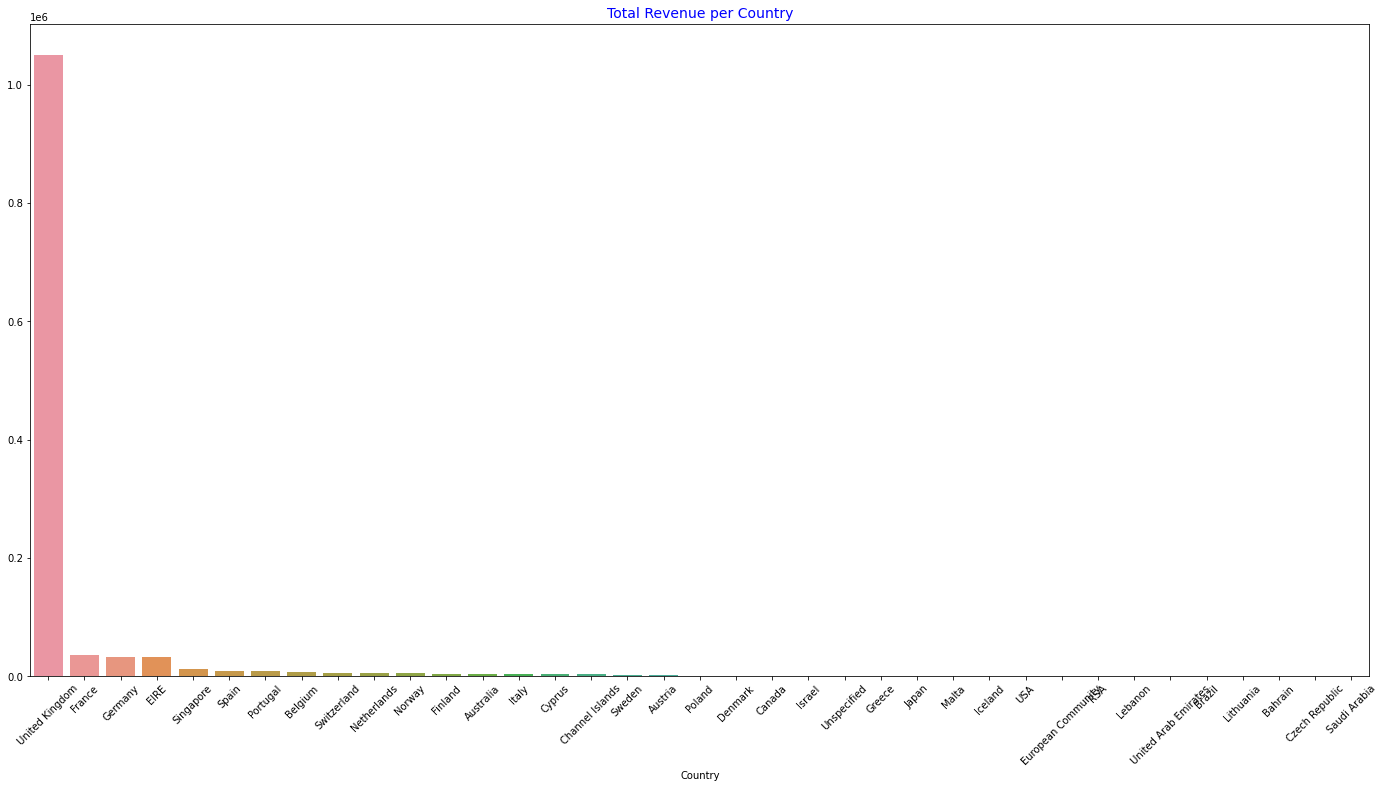

In [35]:
plt.figure(figsize=(24,12))
plt.title("Total Revenue per Country", c="blue", size=14)
plt.xticks(rotation=45)
total_revenue_per_country = df.groupby("Country")["UnitPrice"].sum().sort_values(ascending=False)
sns.barplot(x=total_revenue_per_country.index, y=total_revenue_per_country.values) 

2. Visualize number of customer per country

<AxesSubplot:title={'center':'Total Customer per Country'}, xlabel='Country'>

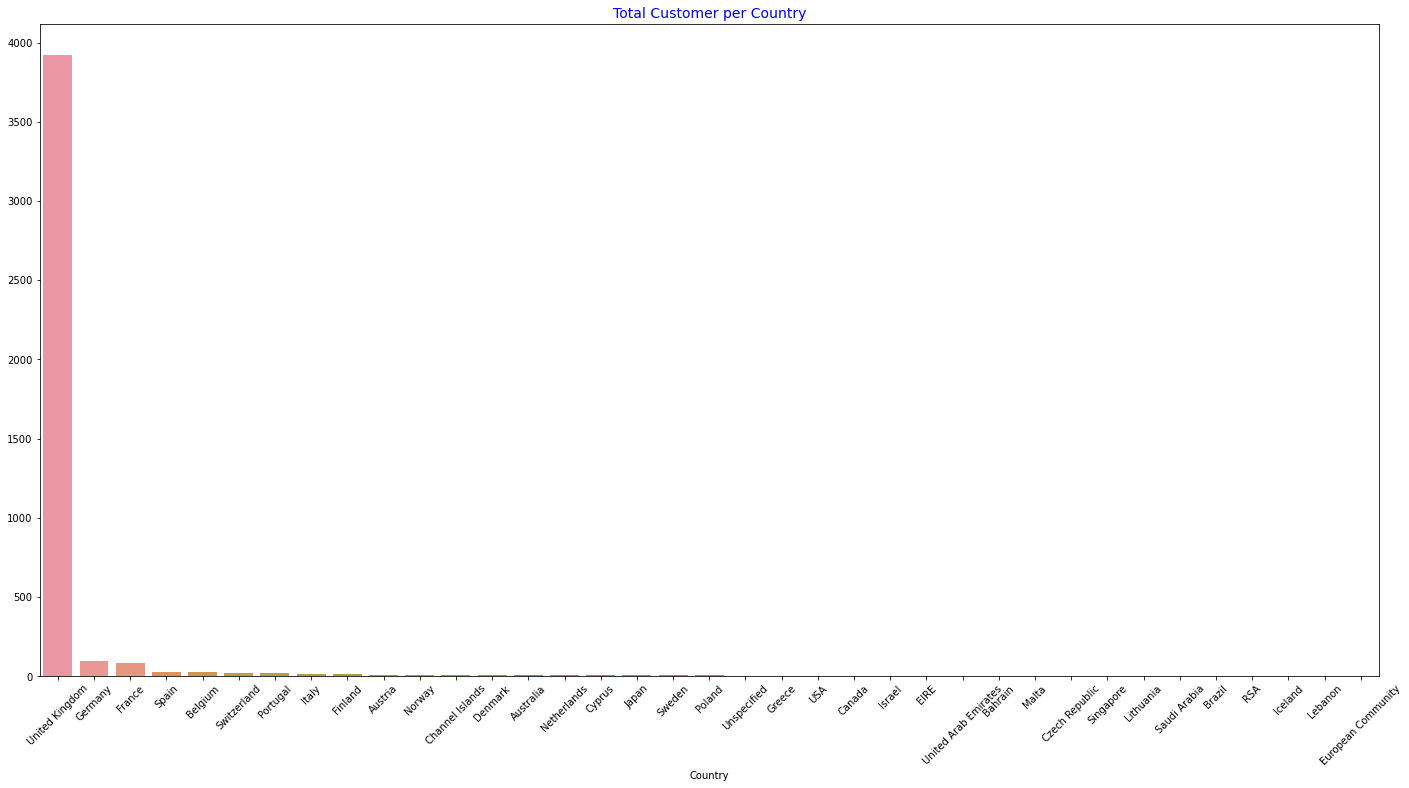

In [36]:
plt.figure(figsize=(24,12))
plt.title("Total Customer per Country", c="blue", size=14)
plt.xticks(rotation=45)
total_customer_per_country = df.groupby("Country")["CustomerID"].nunique().sort_values(ascending=False)
sns.barplot(x=total_customer_per_country.index, y=total_customer_per_country.values) 

3. Visualize total cost per country

In [37]:
df["Cost"] = df["Quantity"] * df["UnitPrice"] # Created Cost column with multiplying Quantity and UnitPrice

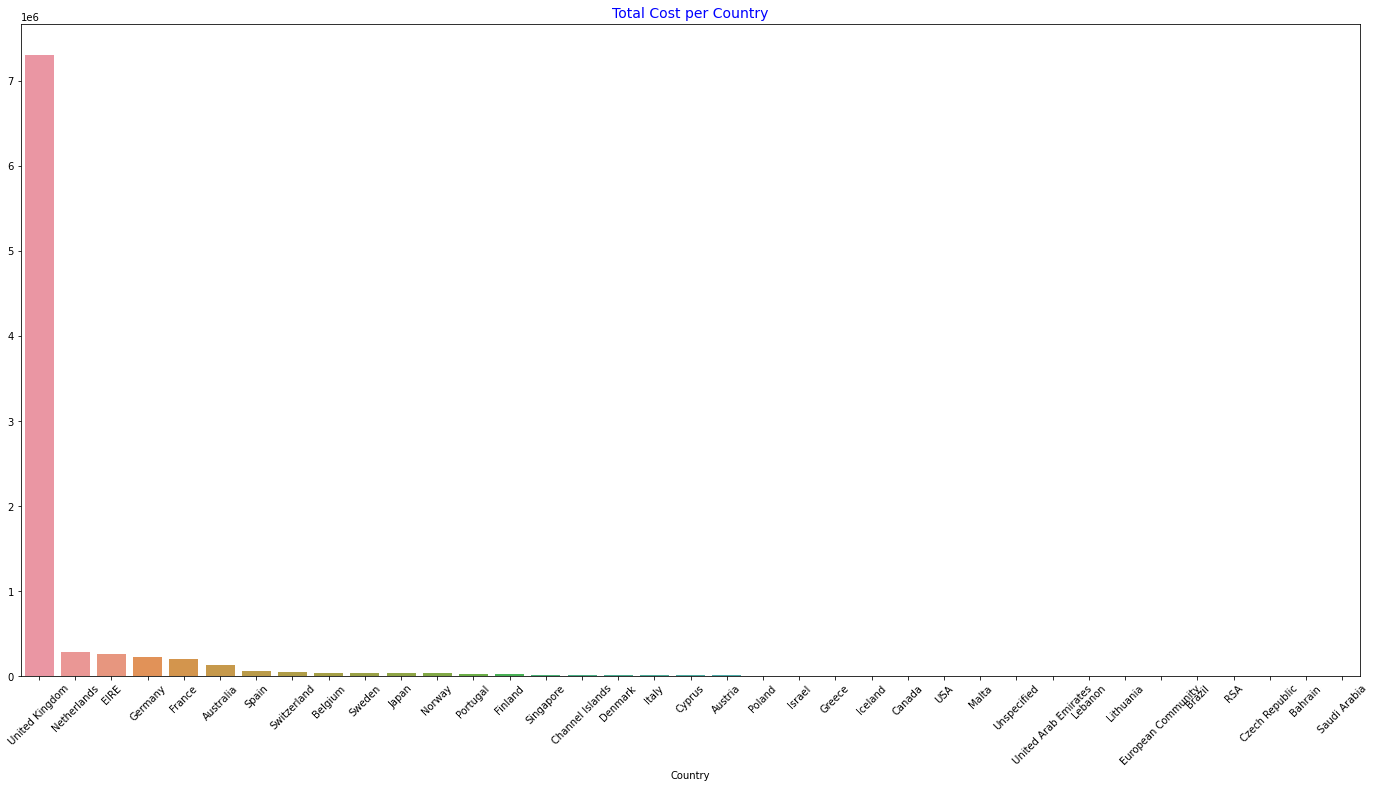

In [38]:
plt.figure(figsize=(24,12))
plt.title("Total Cost per Country", c="blue", size=14)
plt.xticks(rotation=45)
total_cost_per_country = df.groupby("Country")["Cost"].sum().sort_values(ascending=False)
sns.barplot(x=total_cost_per_country.index, y=total_cost_per_country.values);

#### The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.

### vii. Exploring the UK Market


1. Creating df_uk DataFrame

In [39]:
df_uk = df[df["Country"] == "United Kingdom"]

2. What are the most popular products that are bought in the UK?

In [40]:
df_uk[df_uk["StockCode"] == df_uk["StockCode"].value_counts().index[0]]["Description"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    1940
CREAM HANGING HEART T-LIGHT HOLDER       7
Name: Description, dtype: int64

### We will continue analyzing the UK transactions with customer segmentation.

# 2. RFM Analysis

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.


- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value

Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

### i. Import Libraries

In [41]:
import datetime as dt
import re

### ii. Review df_uk DataFrame

In [42]:
df_uk.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34


In [43]:
df_uk.shape

(354345, 9)

In [44]:
df_uk.describe()

,Quantity,UnitPrice,CustomerID,Cost
count,354345.00,354345.00,354345.00,354345.00
mean,12.05,2.96,15552.44,20.63
std,190.43,17.86,1594.55,326.03
min,1.00,0.00,12346.00,0.00
25%,2.00,1.25,14194.00,4.16
50%,4.00,1.95,15522.00,10.20
75%,12.00,3.75,16931.00,17.70
max,80995.00,8142.75,18287.00,168469.60


### iii. Recency: Days since last purchase

1. Choosing a date as a point of reference to evaluate how many days ago was the customer's last purchase.

In [45]:
new_date = dt.datetime.strptime("2011-12-10", "%Y-%m-%d") # Choosing a date, I chose the 1 day after of last date in dataset.
new_date = new_date.date()

2. Creating a new column called Date which contains the invoice date without the timestamp

In [46]:
df_uk["Date"] = df_uk["InvoiceDate"].dt.date 

3. Group by CustomerID and check the last date of purchase

In [47]:
last_date_of_purchase = df_uk.groupby("CustomerID")["Date"].max()

In [48]:
last_date_of_purchase.head()

CustomerID
12346.00    2011-01-18
12747.00    2011-12-07
12748.00    2011-12-09
12749.00    2011-12-06
12820.00    2011-12-06
Name: Date, dtype: object

4. Calculate the days since last purchase

In [49]:
recency = new_date - last_date_of_purchase
recency = recency.astype("str")

def get_number(x):
  return re.findall("\d+", x)[0]

recency = recency.apply(get_number)
recency.head()

CustomerID
12346.00    326
12747.00      3
12748.00      1
12749.00      4
12820.00      4
Name: Date, dtype: object

5. Plot RFM distributions

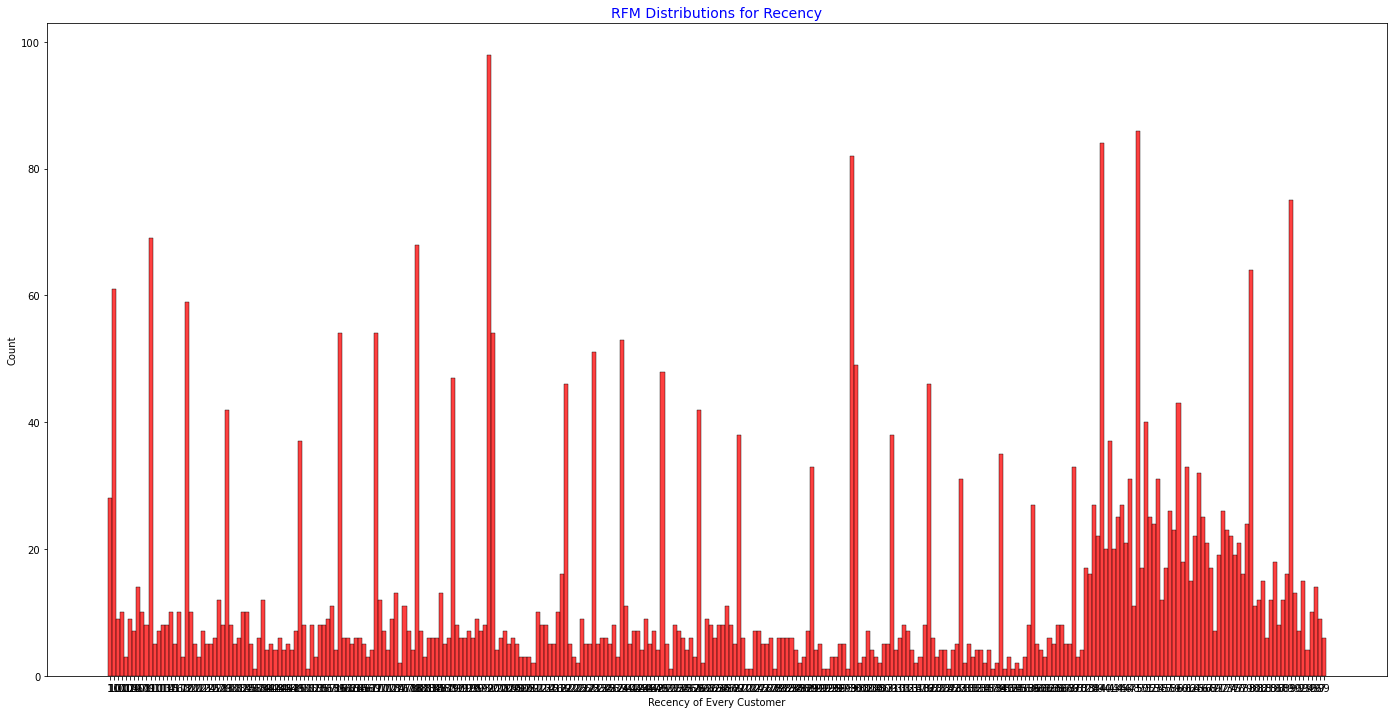

In [50]:
plt.figure(figsize=(24,12))
plt.title("RFM Distributions for Recency", c="blue", size=14)
sns.histplot(recency.sort_values().values, color="Red")
plt.xlabel("Recency of Every Customer");

### iv. Frequency: Number of purchases

1. Copy of df_uk and drop duplicates

In [51]:
df_uk_copy = df_uk.drop_duplicates()
print("df_uk shape:",df_uk.shape)
print("df_uk_copy shape:", df_uk_copy.shape)

df_uk shape: (354345, 10)
df_uk_copy shape: (349227, 10)


2. The frequency of purchases

In [52]:
frequency = df_uk_copy.groupby("CustomerID")["InvoiceNo"].count()
frequency.head()

CustomerID
12346.00       1
12747.00     103
12748.00    4413
12749.00     199
12820.00      59
Name: InvoiceNo, dtype: int64

3. Plot RFM distributions

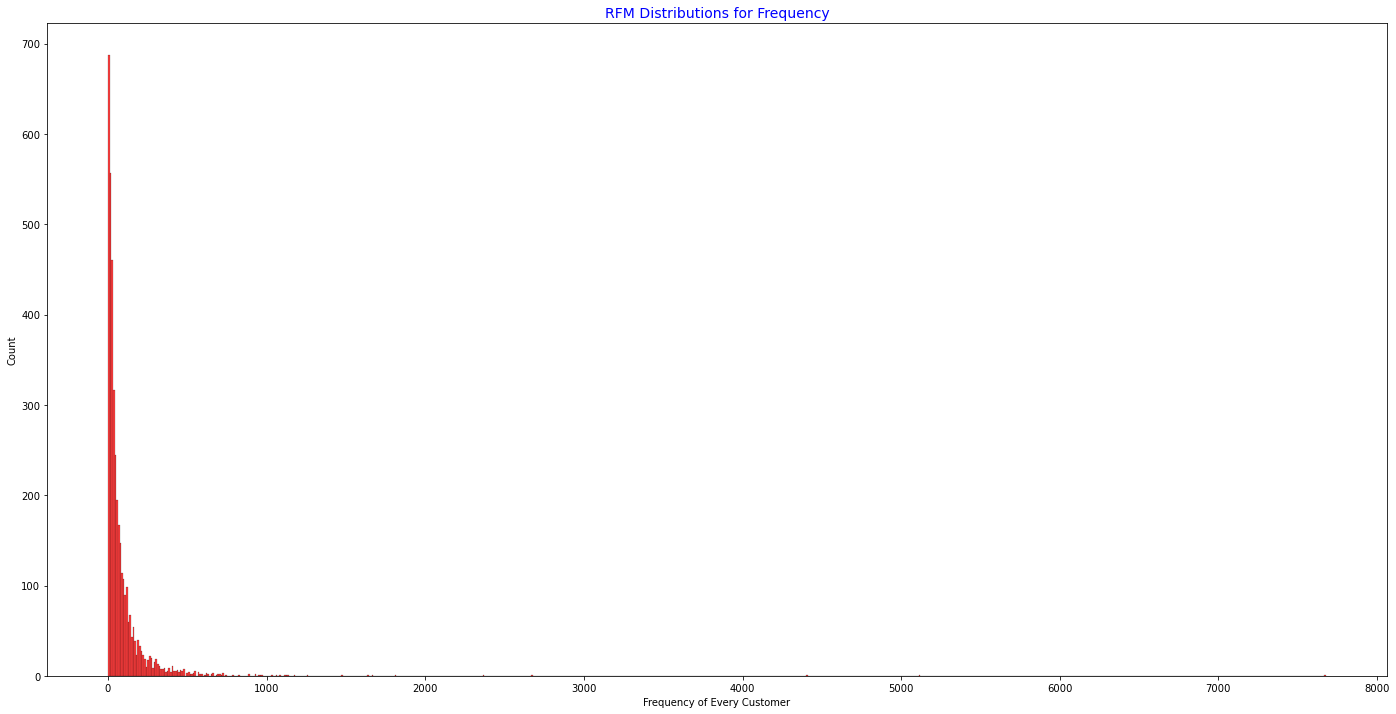

In [53]:
plt.figure(figsize=(24,12))
plt.title("RFM Distributions for Frequency", c="blue", size=14)
sns.histplot(frequency.sort_values(ascending=False).values, color="Red")
plt.xlabel("Frequency of Every Customer");

### v. Monetary: Total amount of money spent

The monetary value is calculated by adding together the cost of the customers' purchases.


1. Calculate sum total cost by customers and named "Monetary"

In [54]:
monetary = df_uk.groupby("CustomerID")["Cost"].sum()
monetary.head()

CustomerID
12346.00   77183.60
12747.00    4196.01
12748.00   33719.73
12749.00    4090.88
12820.00     942.34
Name: Cost, dtype: float64

2. Plot RFM distributions

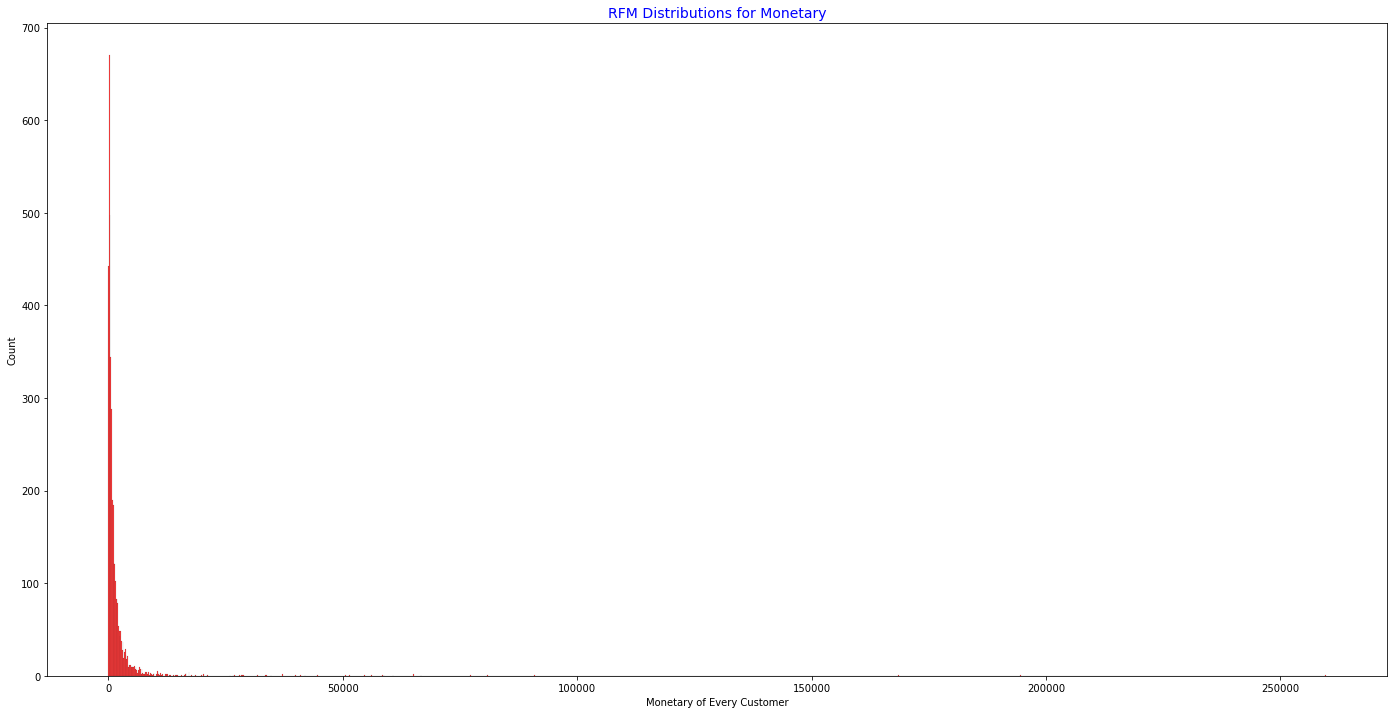

In [55]:
plt.figure(figsize=(24,12))
plt.title("RFM Distributions for Monetary", c="blue", size=14)
sns.histplot(monetary.sort_values(ascending=False).values, color="Red")
plt.xlabel("Monetary of Every Customer");

### vi. Creating RFM Table

In [56]:
df_rfm = pd.concat([recency, frequency, monetary], axis=1)
df_rfm = df_rfm.rename(columns={"Date":"Recency", "InvoiceNo":"Frequency", "Cost":"Monetary"})
df_rfm["Recency"] = df_rfm["Recency"].astype("int")
df_rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.00,326,1,77183.60
12747.00,3,103,4196.01
12748.00,1,4413,33719.73
12749.00,4,199,4090.88
12820.00,4,59,942.34


# 3. Customer Segmentation with RFM Scores

##  RFM Score

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis.


1. Dividing the df_rfm into quarters

In [57]:
df_rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.00,326,1,77183.60
12747.00,3,103,4196.01
12748.00,1,4413,33719.73
12749.00,4,199,4090.88
12820.00,4,59,942.34
...,...,...,...
18280.00,278,10,180.60
18281.00,181,7,80.82
18282.00,8,12,178.05


### i. Creating the RFM Segmentation Table


1. Functions

In [58]:
def recency_quarter(x):

    recency_quantile = df_rfm["Recency"].quantile([0.25, 0.50, 0.75]).values 
    if x <= recency_quantile[0]:
        return 4
    elif x <= recency_quantile[1]:
        return 3
    elif x <= recency_quantile[2]:
        return 2
    else:
        return 1

In [59]:
def frequency_quarter(x):
    
    frequency_quantile = df_rfm["Frequency"].quantile([0.25, 0.50, 0.75]).values 
    if x <= frequency_quantile[0]:
        return 1
    elif x <= frequency_quantile[1]:
        return 2
    elif x <= frequency_quantile[2]:
        return 3
    else:
        return 4

In [60]:
def monetary_quarter(x):
    
    monetary_quantile = df_rfm["Monetary"].quantile([0.25, 0.50, 0.75]).values 
    if x <= monetary_quantile[0]:
        return 1
    elif x <= monetary_quantile[1]:
        return 2
    elif x <= monetary_quantile[2]:
        return 3
    else:
        return 4

2. Scoring customers from 1 - 4 with functions

In [61]:
df_rfm["RecencyScore"] = df_rfm["Recency"].apply(recency_quarter)
df_rfm["FrequencyScore"] = df_rfm["Frequency"].apply(frequency_quarter)
df_rfm["MonetaryScore"] = df_rfm["Monetary"].apply(monetary_quarter)

In [62]:
df_rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.00,326,1,77183.60,1,1,4
12747.00,3,103,4196.01,4,4,4
12748.00,1,4413,33719.73,4,4,4
12749.00,4,199,4090.88,4,4,4
12820.00,4,59,942.34,4,3,3


3. Combining scores for segmentation

In [63]:
df_rfm["CombinedScore"] = df_rfm["RecencyScore"].astype("str") + df_rfm["FrequencyScore"].astype("str") + df_rfm["MonetaryScore"].astype("str")
df_rfm["CombinedScore"] = df_rfm["CombinedScore"].astype("int")
print("Combined Score unique values:", df_rfm["CombinedScore"].nunique())
df_rfm["CombinedScore"].head()

Combined Score unique values: 61


CustomerID
12346.00    114
12747.00    444
12748.00    444
12749.00    444
12820.00    433
Name: CombinedScore, dtype: int32

In [64]:
df_rfm["CombinedScoreTotal"] = df_rfm["RecencyScore"] + df_rfm["FrequencyScore"] + df_rfm["MonetaryScore"]
df_rfm["CombinedScoreTotal"] = df_rfm["CombinedScoreTotal"].astype("int")
print("Combined Score Total unique values:", df_rfm["CombinedScoreTotal"].nunique())
df_rfm["CombinedScoreTotal"].head()

Combined Score Total unique values: 10


CustomerID
12346.00     6
12747.00    12
12748.00    12
12749.00    12
12820.00    10
Name: CombinedScoreTotal, dtype: int32

In [65]:
df_rfm["CombinedScoreTotal"].value_counts()

5     467
6     429
8     411
12    407
7     388
10    386
9     378
4     362
11    349
3     344
Name: CombinedScoreTotal, dtype: int64

CombinedScore has 61 unique values. On the other hand, CombinedScoreTotal has 10 unique values. Labelling CombinedScoreTotal is more accountable.

In [66]:
df_rfm.drop("CombinedScore", axis=1, inplace=True)

4. Defining rfm_level function that tags customers by using RFM_Scrores and Creating RFM Level

In [67]:
df_rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,CombinedScoreTotal
CustomerID,,,,,,,
12346.00,326,1,77183.60,1,1,4,6
12747.00,3,103,4196.01,4,4,4,12
12748.00,1,4413,33719.73,4,4,4,12
12749.00,4,199,4090.88,4,4,4,12
12820.00,4,59,942.34,4,3,3,10


In [68]:
def rfm_tags(x):
    if x <= 4:
        return "Requires Action"
    elif x <= 6:
        return "Low Interaction"
    elif x <= 8:
        return "Needs Attention"
    elif x <=10:
        return "Promising"
    else:
        return "Best"

In [69]:
df_rfm["rfm_level"] = df_rfm["CombinedScoreTotal"].apply(rfm_tags)
df_rfm["rfm_level"].head()

CustomerID
12346.00    Low Interaction
12747.00               Best
12748.00               Best
12749.00               Best
12820.00          Promising
Name: rfm_level, dtype: object

5. Value counts for RFM level and average combined score

In [70]:
df_rfm.groupby("rfm_level")["CombinedScoreTotal"].count() # Size of each segment

rfm_level
Best               756
Low Interaction    896
Needs Attention    799
Promising          764
Requires Action    706
Name: CombinedScoreTotal, dtype: int64

In [71]:
df_rfm.groupby("rfm_level")["CombinedScoreTotal"].mean() # Average Combined Score of each segment

rfm_level
Best              11.54
Low Interaction    5.48
Needs Attention    7.51
Promising          9.51
Requires Action    3.51
Name: CombinedScoreTotal, dtype: float64

## Plot RFM Segments

1. Creating Plot

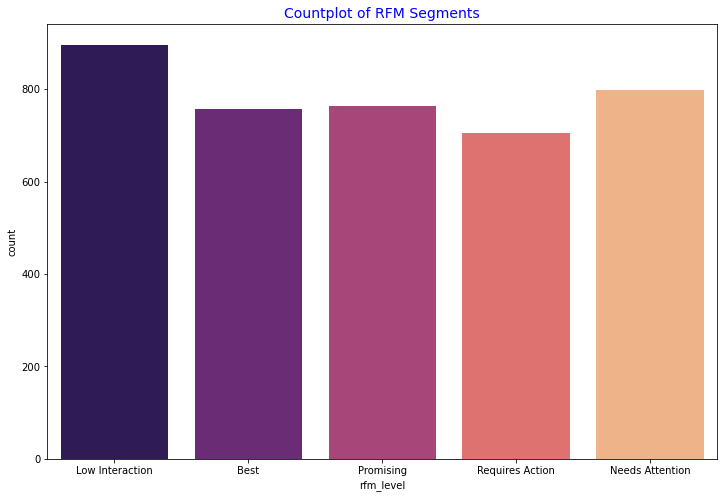

In [72]:
plt.figure(figsize=(12,8))
plt.title("Countplot of RFM Segments", c="blue", size=14)
sns.countplot(df_rfm["rfm_level"], palette="magma");

2. How many customers do we have in each segment?

In [73]:
df_rfm.groupby("rfm_level")["CombinedScoreTotal"].count() # Size of each segment

rfm_level
Best               756
Low Interaction    896
Needs Attention    799
Promising          764
Requires Action    706
Name: CombinedScoreTotal, dtype: int64

# 3. Applying K-Means Clustering

Now that we have our customers segmented into 5 different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.

## Data Pre-Processing and Exploring

In [74]:
df_rfm2 = df_rfm[["Recency", "Frequency", "Monetary"]]
df_rfm2.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.00,326,1,77183.60
12747.00,3,103,4196.01
12748.00,1,4413,33719.73
12749.00,4,199,4090.88
12820.00,4,59,942.34


In [75]:
df_rfm2.describe()

,Recency,Frequency,Monetary
count,3921.00,3921.00,3921.00
mean,92.72,89.07,1863.91
std,99.53,214.02,7481.92
min,1.00,1.00,0.00
25%,18.00,17.00,300.04
50%,51.00,40.00,651.82
75%,143.00,98.00,1575.89
max,374.00,7676.00,259657.30


### i. Feature Correlations

Heatmap

<AxesSubplot:>

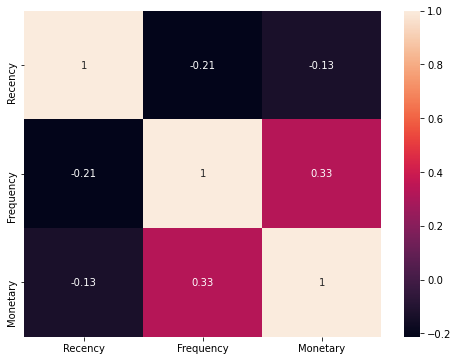

In [76]:
plt.figure(figsize=(8,6))
sns.heatmap(df_rfm2.corr(), annot=True)

### ii. Visualize Feature Distributions

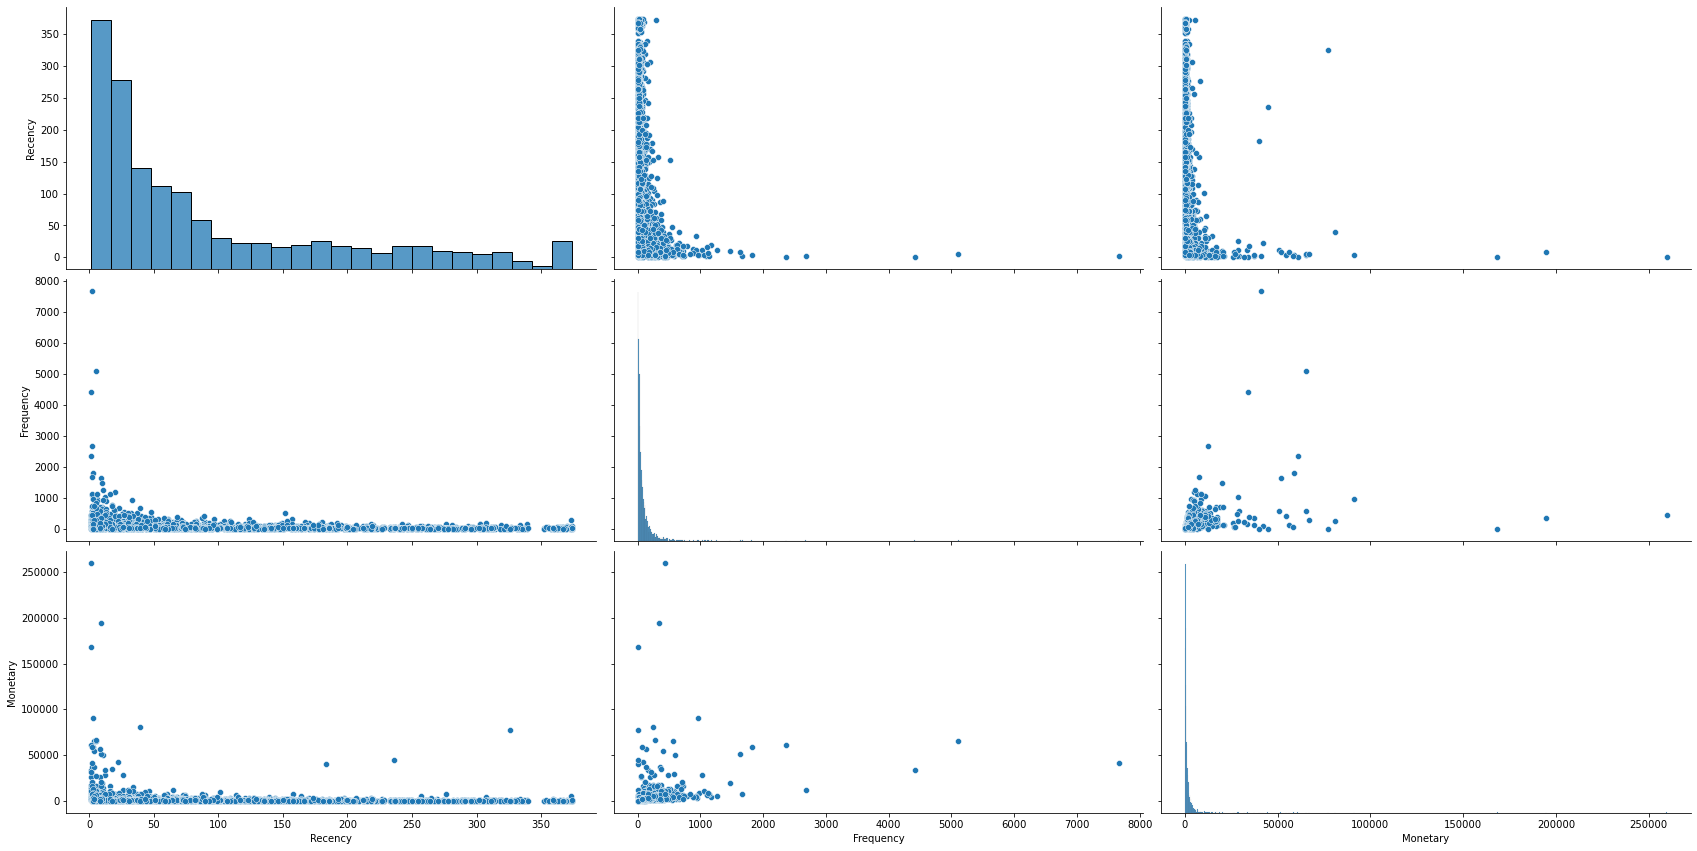

In [77]:
sns.pairplot(df_rfm2, aspect=2, height=4)

### iii. Data Normalization

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_rfm2)
rfm_scaled = pd.DataFrame(rfm_scaled, columns=["Recency", "Frequency", "Monetary"])
rfm_scaled.describe()

,Recency,Frequency,Monetary
count,3921.00,3921.00,3921.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-0.92,-0.41,-0.25
25%,-0.75,-0.34,-0.21
50%,-0.42,-0.23,-0.16
75%,0.51,0.04,-0.04
max,2.83,35.45,34.46


2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

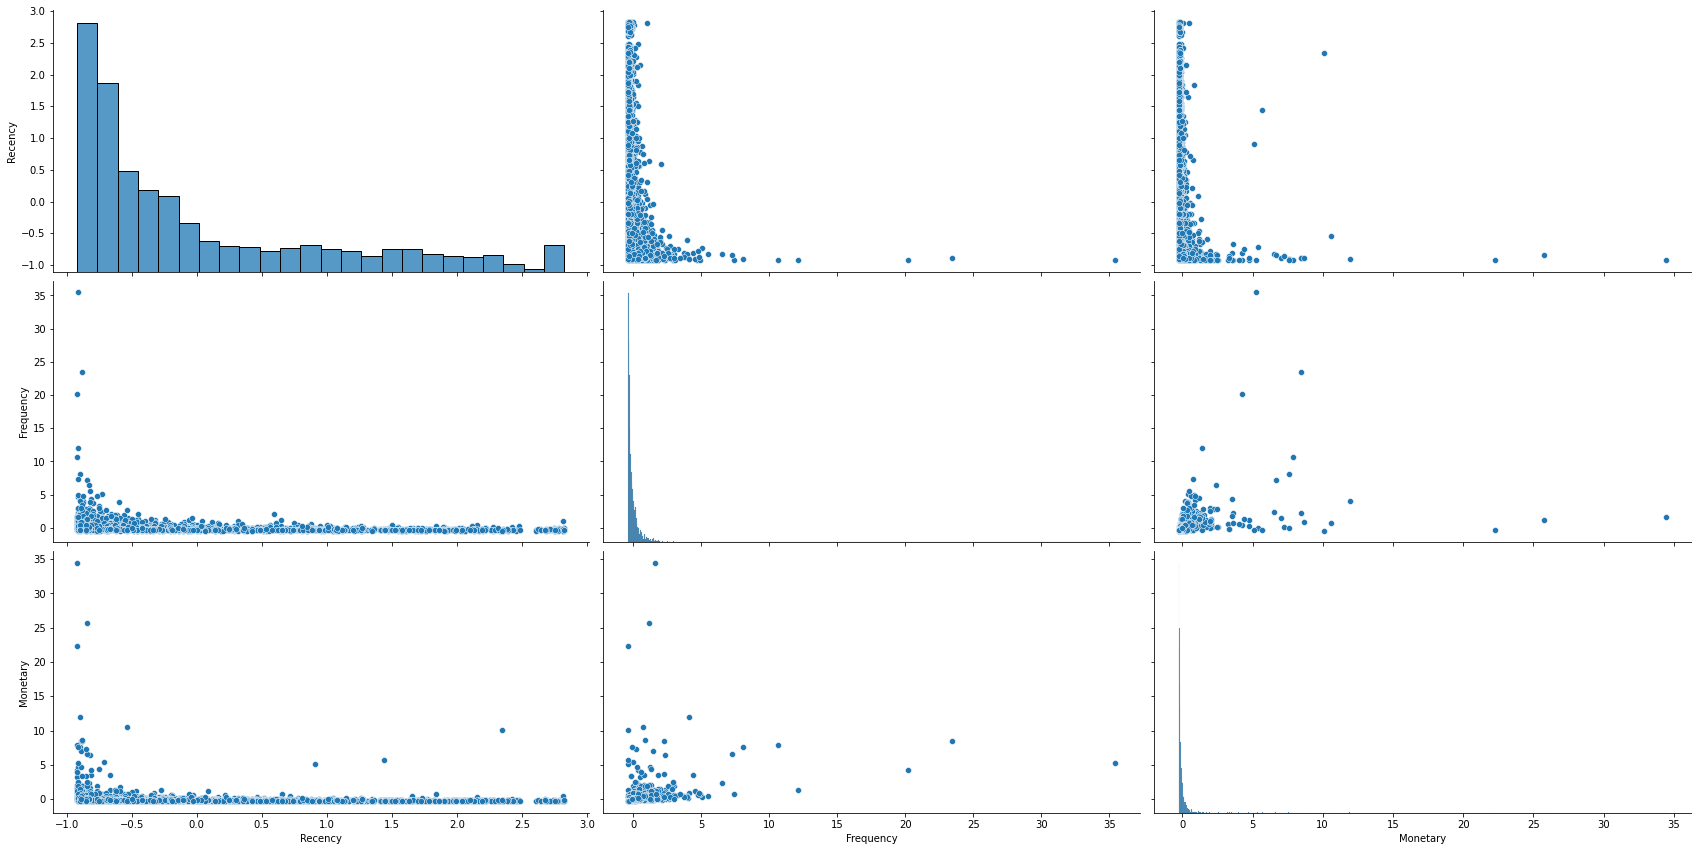

In [79]:
sns.pairplot(rfm_scaled, aspect=2, height=4)

## K-Means Implementation

We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 

### i. Defining the Optimal Number of Clusters

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

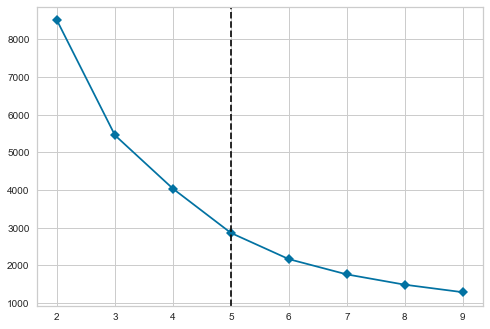

In [80]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(rfm_scaled)
visualizer;

From the visualizer, optimal number of clusters is 5 and we can understand this from the various silhouette scores.

[Silhouette Coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [81]:
from sklearn.metrics import silhouette_score

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_scaled)
    print(f"K Means Clustering --> n={i} and Silhouette Score =",silhouette_score(rfm_scaled, kmeans.labels_))

K Means Clustering --> n=2 and Silhouette Score = 0.5668030737167589
K Means Clustering --> n=3 and Silhouette Score = 0.5926527495159604
K Means Clustering --> n=4 and Silhouette Score = 0.5955585047621389
K Means Clustering --> n=5 and Silhouette Score = 0.6170643907537862
K Means Clustering --> n=6 and Silhouette Score = 0.5914154109173868
K Means Clustering --> n=7 and Silhouette Score = 0.5173200520009247
K Means Clustering --> n=8 and Silhouette Score = 0.5101349017371272
K Means Clustering --> n=9 and Silhouette Score = 0.46960449865647497


### ii. Model Fitting

In [82]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=5)

### iii. Visualize the Clusters

1. Creating a scatter plot and selecting cluster centers

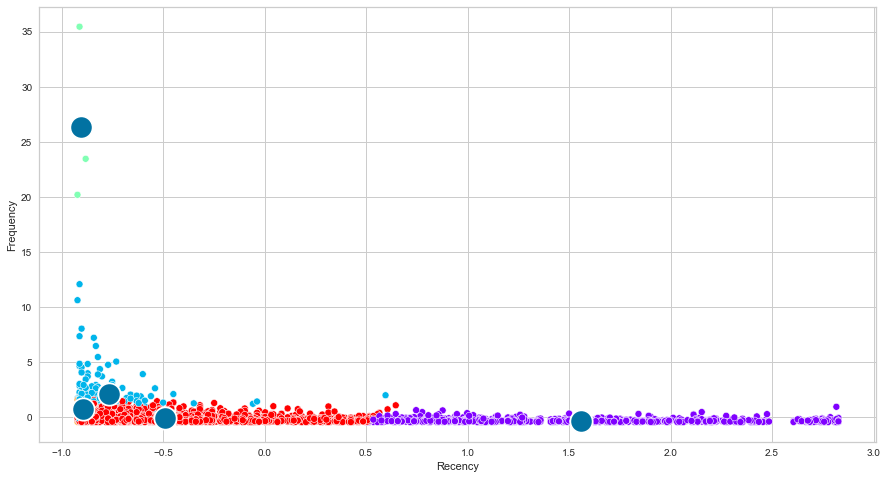

In [83]:
plt.figure(figsize=(15,8))
rfm_scaled["cluster"] = kmeans.labels_
centroids = kmeans.cluster_centers_
sns.scatterplot(rfm_scaled.iloc[:,0], rfm_scaled.iloc[:, 1], c=rfm_scaled["cluster"], cmap="rainbow")
sns.scatterplot(list(centroids[:,0]), list(centroids[:,1]), s=500)
plt.show()

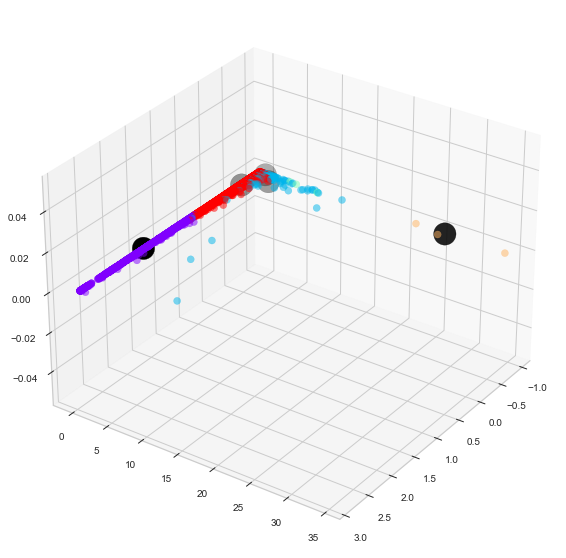

In [84]:
from mpl_toolkits.mplot3d import Axes3D # 3D Scatterplot

%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.scatter3D(rfm_scaled.iloc[:,0], rfm_scaled.iloc[:, 2], c=rfm_scaled["cluster"], cmap="rainbow", s=50, alpha=0.5)
ax.scatter3D(list(centroids[:,0]), list(centroids[:,1]), s=500, color="black")
ax.view_init(30, 35)
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

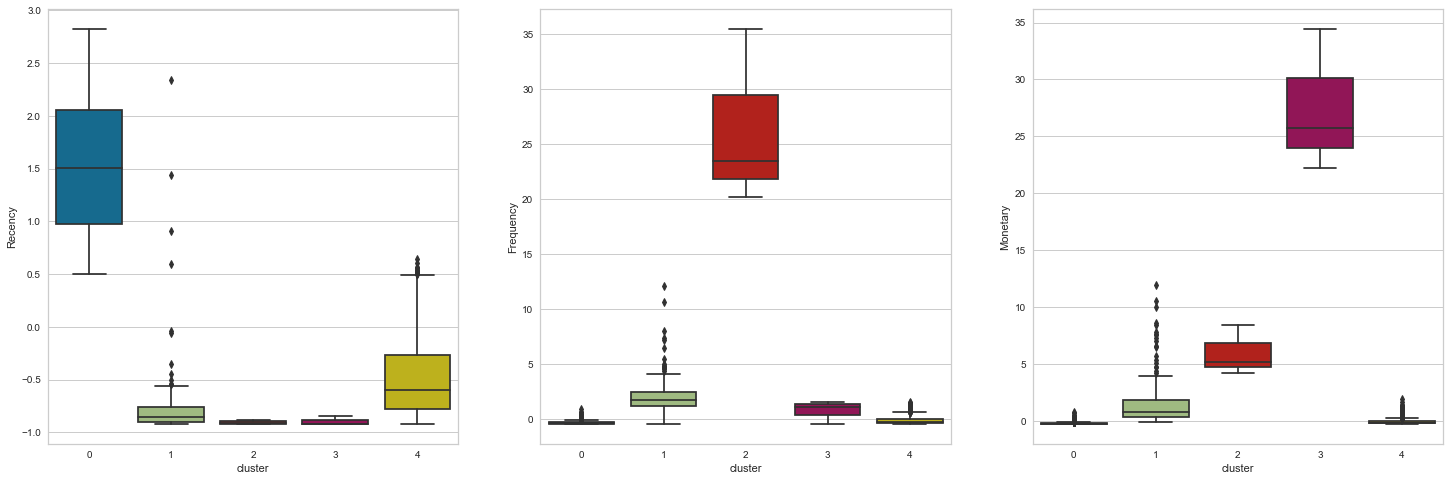

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

sns.boxplot(x="cluster", y="Recency", data=rfm_scaled, ax=ax[0])
sns.boxplot(x="cluster", y="Frequency", data=rfm_scaled, ax=ax[1])
sns.boxplot(x="cluster", y="Monetary", data=rfm_scaled, ax=ax[2])

### KMeans Clustering with MinMax Scaler

In [86]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(df_rfm2)
rfm_scaled = pd.DataFrame(rfm_scaled, columns=["Recency", "Frequency", "Monetary"])
rfm_scaled.describe()

,Recency,Frequency,Monetary
count,3921.00,3921.00,3921.00
mean,0.25,0.01,0.01
std,0.27,0.03,0.03
min,0.00,0.00,0.00
25%,0.05,0.00,0.00
50%,0.13,0.01,0.00
75%,0.38,0.01,0.01
max,1.00,1.00,1.00


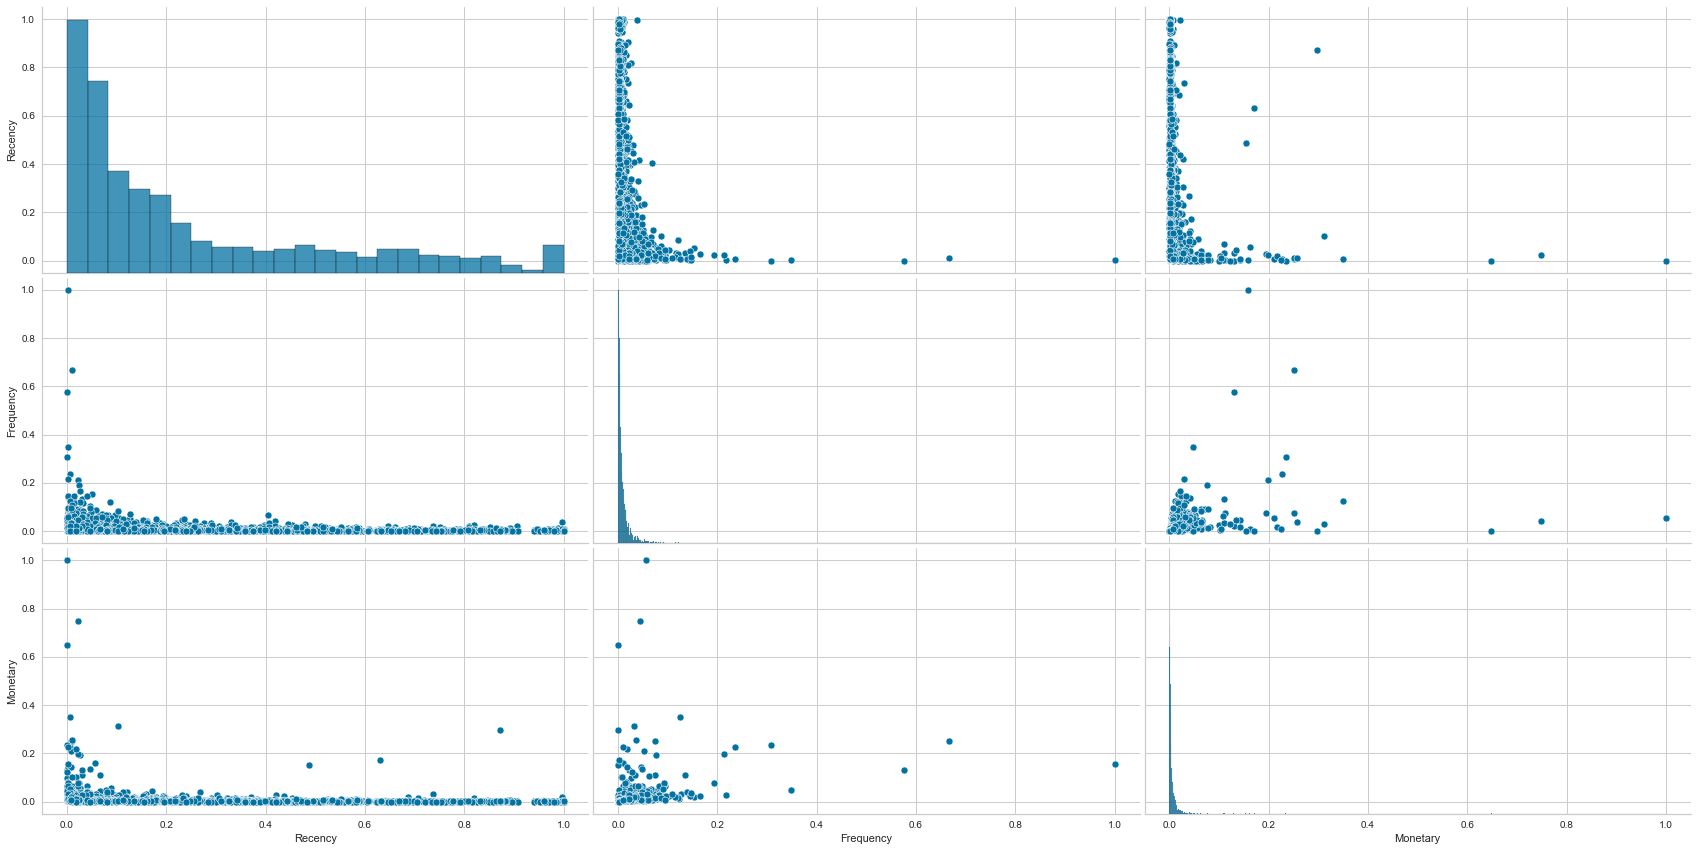

In [87]:
sns.pairplot(rfm_scaled, aspect=2, height=4)

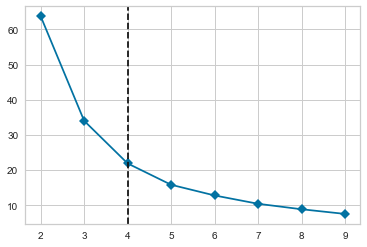

In [88]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(rfm_scaled)
visualizer;

In [89]:
from sklearn.metrics import silhouette_score

for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_scaled)
    print(f"K Means Clustering --> n={i} and Silhouette Score =",silhouette_score(rfm_scaled, kmeans.labels_))

K Means Clustering --> n=2 and Silhouette Score = 0.7268971229373813
K Means Clustering --> n=3 and Silhouette Score = 0.655340047258536
K Means Clustering --> n=4 and Silhouette Score = 0.5746188622032539
K Means Clustering --> n=5 and Silhouette Score = 0.5696210275805442
K Means Clustering --> n=6 and Silhouette Score = 0.5478185542460665
K Means Clustering --> n=7 and Silhouette Score = 0.5448610256792281
K Means Clustering --> n=8 and Silhouette Score = 0.49227499801996377
K Means Clustering --> n=9 and Silhouette Score = 0.4933261215783077


In [90]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=4)

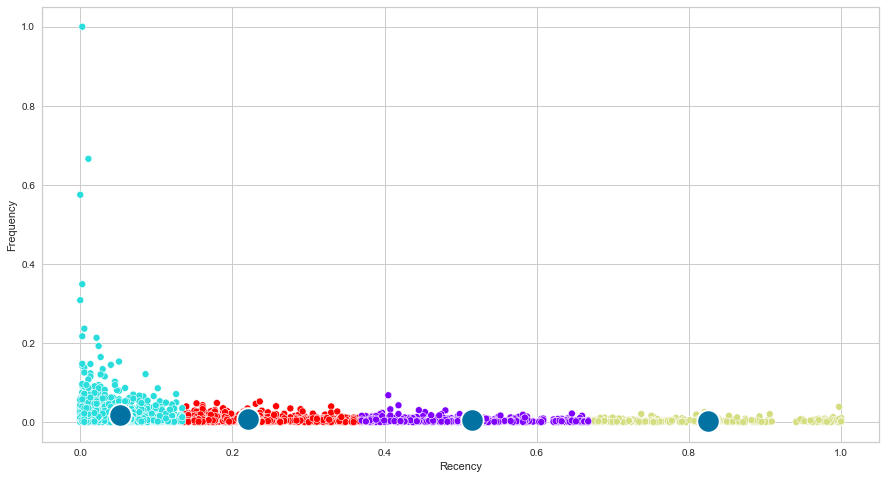

In [91]:
plt.figure(figsize=(15,8))
rfm_scaled["cluster"] = kmeans.labels_
centroids = kmeans.cluster_centers_
sns.scatterplot(rfm_scaled.iloc[:,0], rfm_scaled.iloc[:, 1], c=rfm_scaled["cluster"], cmap="rainbow")
sns.scatterplot(list(centroids[:,0]), list(centroids[:,1]), s=500)
plt.show()

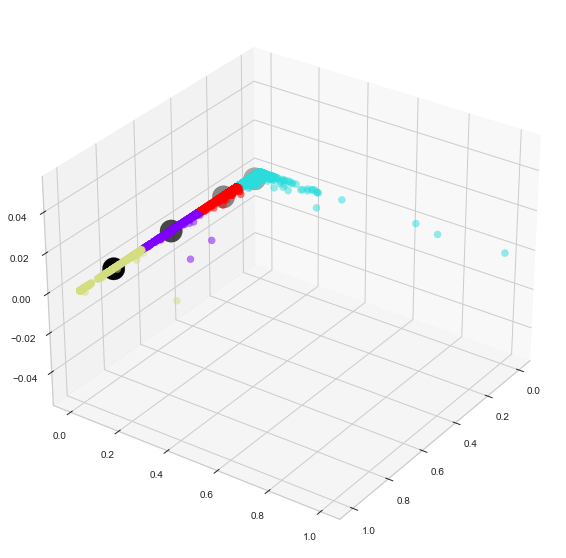

In [92]:
from mpl_toolkits.mplot3d import Axes3D # 3D Scatterplot

%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.scatter3D(rfm_scaled.iloc[:,0], rfm_scaled.iloc[:, 2], c=rfm_scaled["cluster"], cmap="rainbow", s=50, alpha=0.5)
ax.scatter3D(list(centroids[:,0]), list(centroids[:,1]), s=500, color="black")
ax.view_init(30, 35)
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

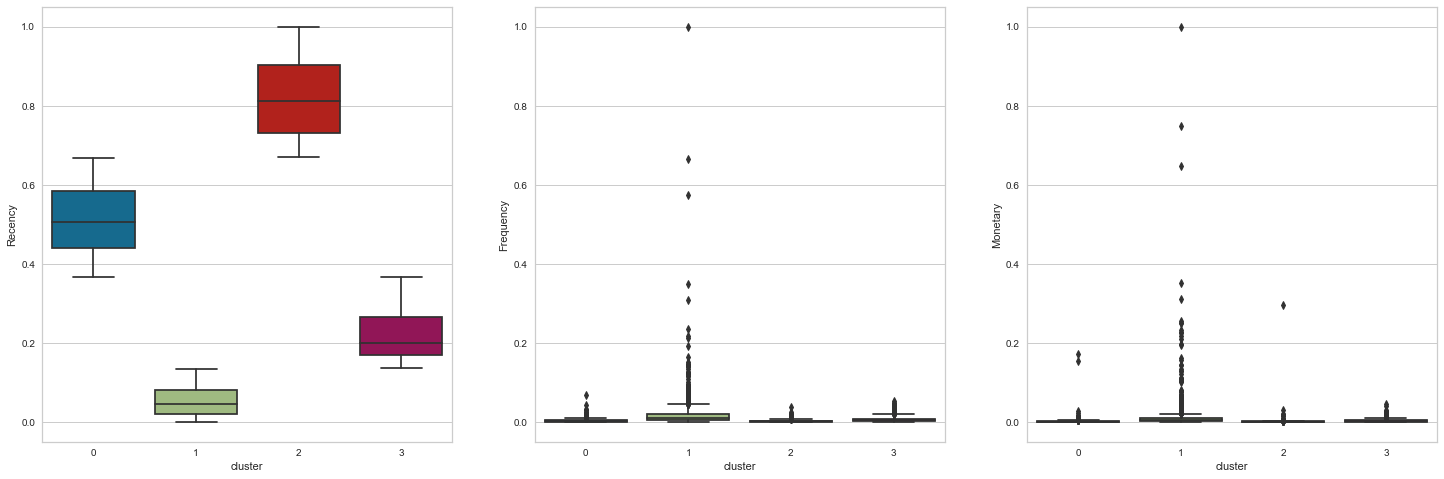

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

sns.boxplot(x="cluster", y="Recency", data=rfm_scaled, ax=ax[0])
sns.boxplot(x="cluster", y="Frequency", data=rfm_scaled, ax=ax[1])
sns.boxplot(x="cluster", y="Monetary", data=rfm_scaled, ax=ax[2])

### KMeans Clustering with Logaritm Normalization

In [94]:
rfm_scaled = np.log1p(df_rfm2)
rfm_scaled.fillna(0, inplace=True)

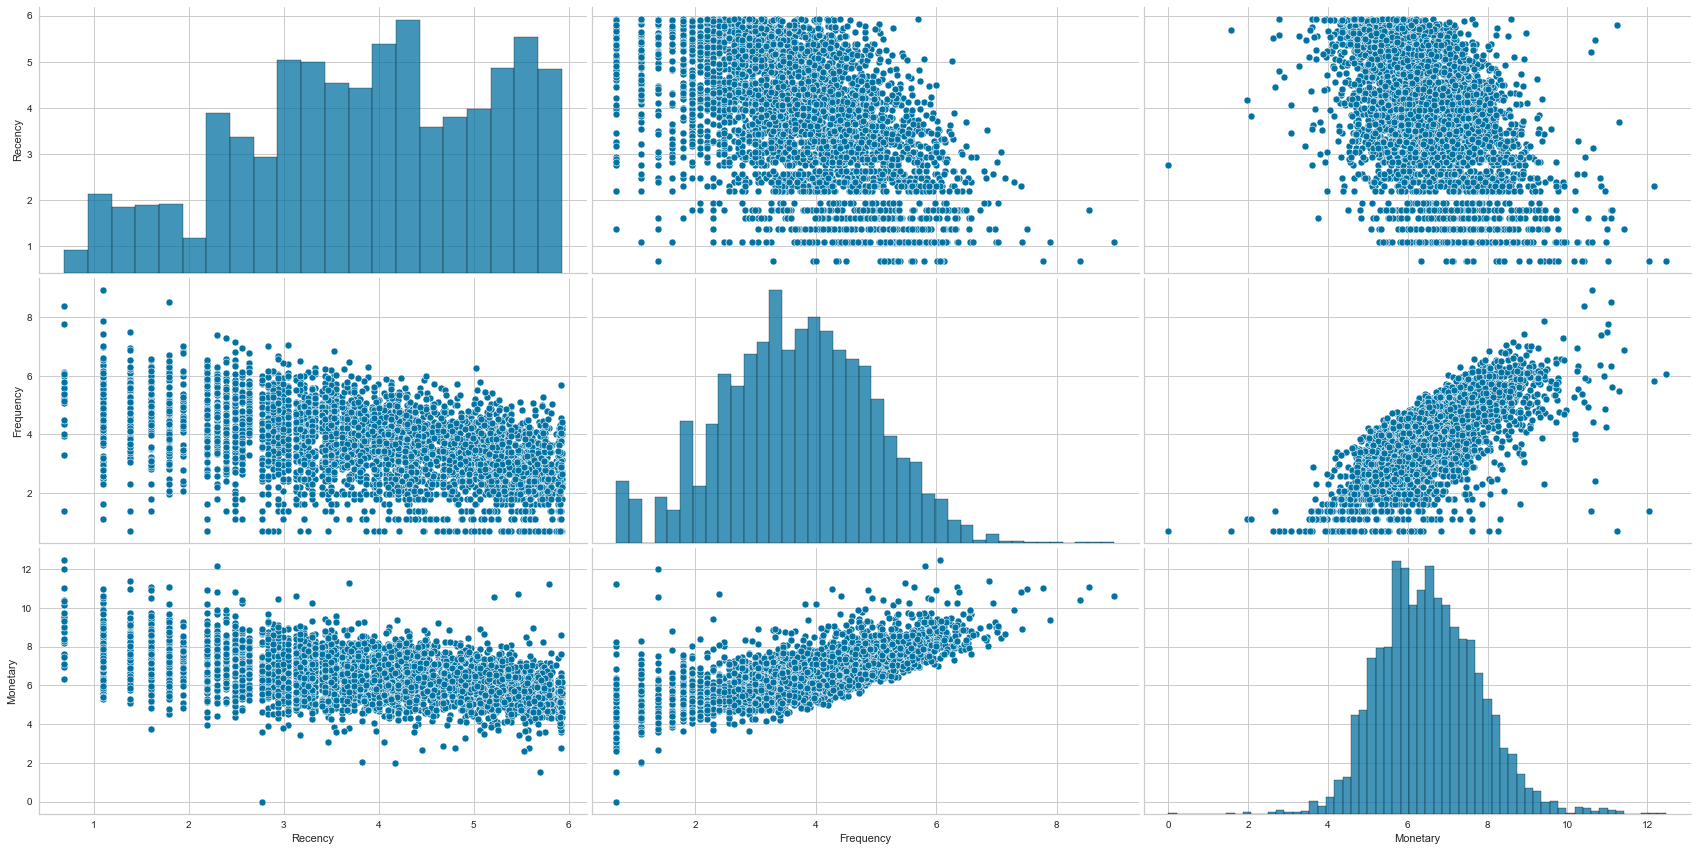

In [95]:
sns.pairplot(rfm_scaled, aspect=2, height=4)

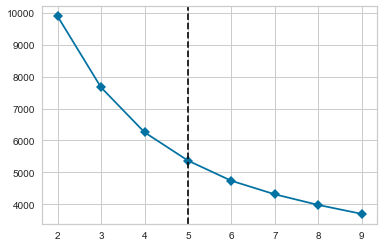

In [96]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(rfm_scaled)
visualizer;

In [97]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_scaled)
    print(f"K Means Clustering --> n={i} and Silhouette Score =",silhouette_score(rfm_scaled, kmeans.labels_))

K Means Clustering --> n=2 and Silhouette Score = 0.3993174018571728
K Means Clustering --> n=3 and Silhouette Score = 0.30445519285349587
K Means Clustering --> n=4 and Silhouette Score = 0.3089891369198756
K Means Clustering --> n=5 and Silhouette Score = 0.27692445012317324
K Means Clustering --> n=6 and Silhouette Score = 0.2729360942051307
K Means Clustering --> n=7 and Silhouette Score = 0.2641246532474009
K Means Clustering --> n=8 and Silhouette Score = 0.26062542481529705
K Means Clustering --> n=9 and Silhouette Score = 0.2608648608447528


In [98]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(rfm_scaled)

KMeans(n_clusters=5)

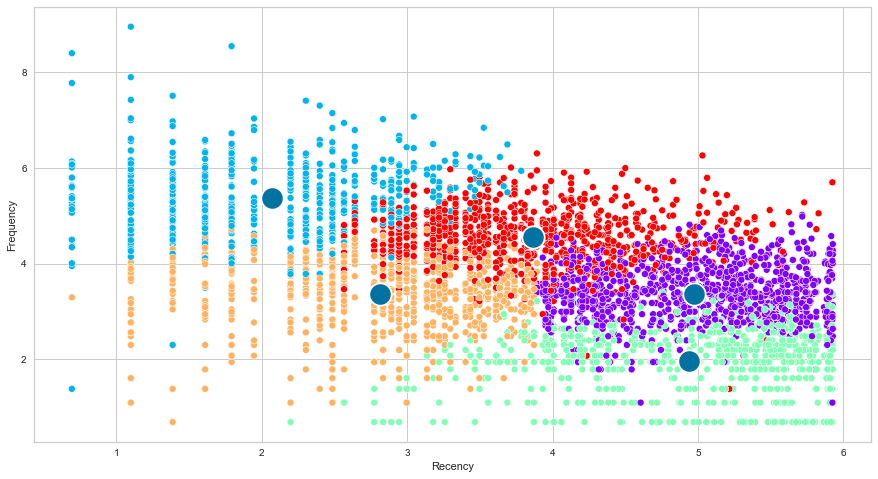

In [99]:
plt.figure(figsize=(15,8))
rfm_scaled["cluster"] = kmeans.labels_
centroids = kmeans.cluster_centers_
sns.scatterplot(rfm_scaled.iloc[:,0], rfm_scaled.iloc[:, 1], c=rfm_scaled["cluster"], cmap="rainbow")
sns.scatterplot(list(centroids[:,0]), list(centroids[:,1]), s=500)
plt.show()

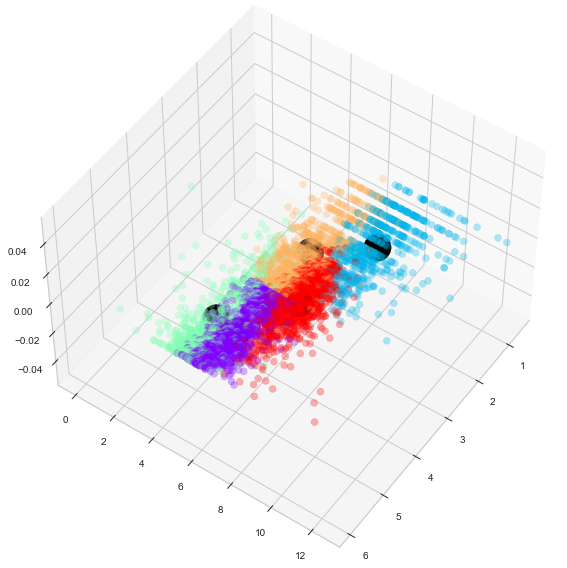

In [100]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.scatter3D(rfm_scaled.iloc[:,0], rfm_scaled.iloc[:, 2], c=rfm_scaled["cluster"], cmap="rainbow", s=50, alpha=0.3)
ax.scatter3D(list(centroids[:,0]), list(centroids[:,2]), s=750, color="black", alpha=1)
ax.view_init(50, 35)
plt.show()

<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

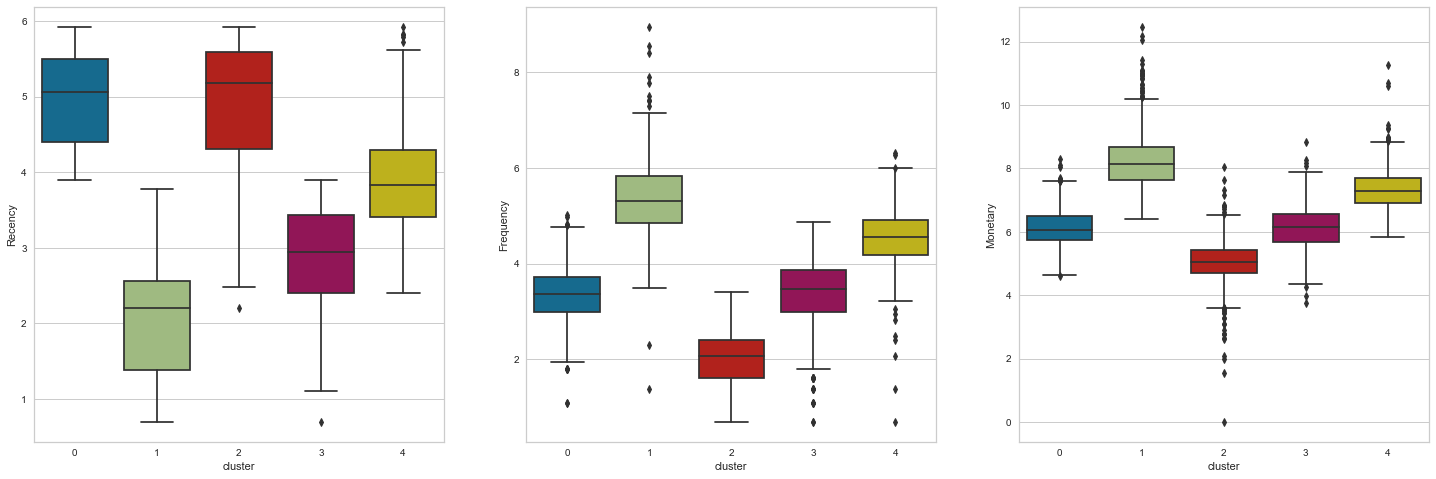

In [101]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

sns.boxplot(x="cluster", y="Recency", data=rfm_scaled, ax=ax[0])
sns.boxplot(x="cluster", y="Frequency", data=rfm_scaled, ax=ax[1])
sns.boxplot(x="cluster", y="Monetary", data=rfm_scaled, ax=ax[2])

### iv. Assigning the Label

1. Visualizing Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. 

<AxesSubplot:xlabel='cluster', ylabel='Monetary'>

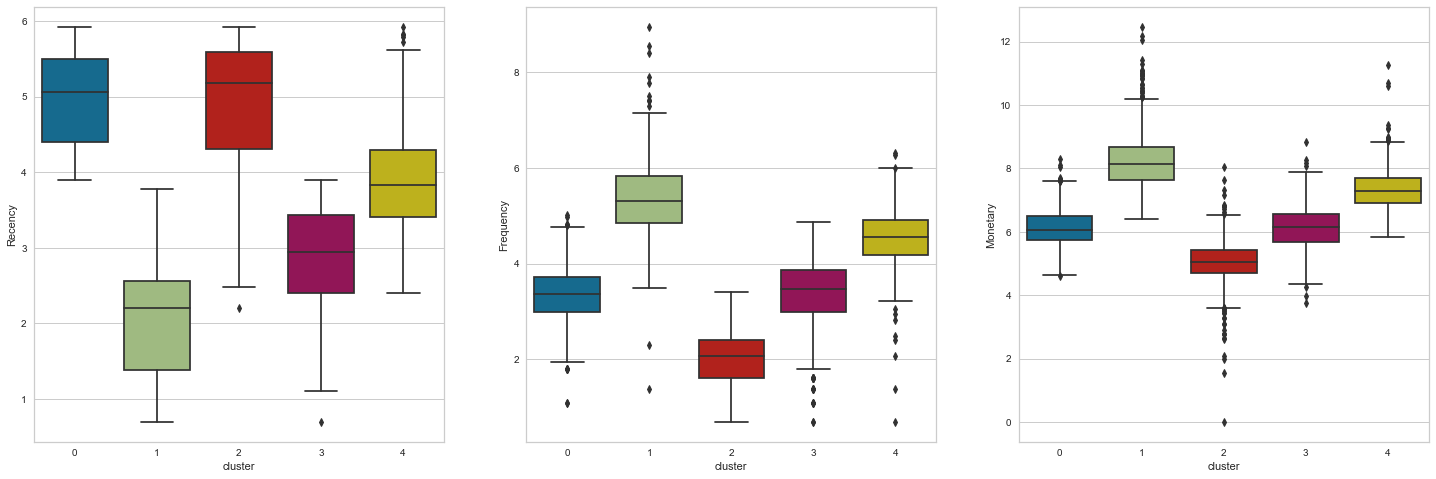

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

sns.boxplot(x="cluster", y="Recency", data=rfm_scaled, ax=ax[0])
sns.boxplot(x="cluster", y="Frequency", data=rfm_scaled, ax=ax[1])
sns.boxplot(x="cluster", y="Monetary", data=rfm_scaled, ax=ax[2])

2. We can determine clusters from the above plots. Lower Recency and higher Frequency and higher Monetary gives as perfect customer and the reverse tells us that we have to look that customers deeply.

In [123]:
def assign_label(x):
    if x == 1:
        return "Best"
    elif x == 3:
        return "Promising"
    elif x == 4:
        return "Needs Attention"
    elif x == 0:
        return "Low Interaction"
    else:
        return "Requires Action"

In [124]:
rfm_scaled["cluster_label"] = rfm_scaled["cluster"].apply(assign_label)

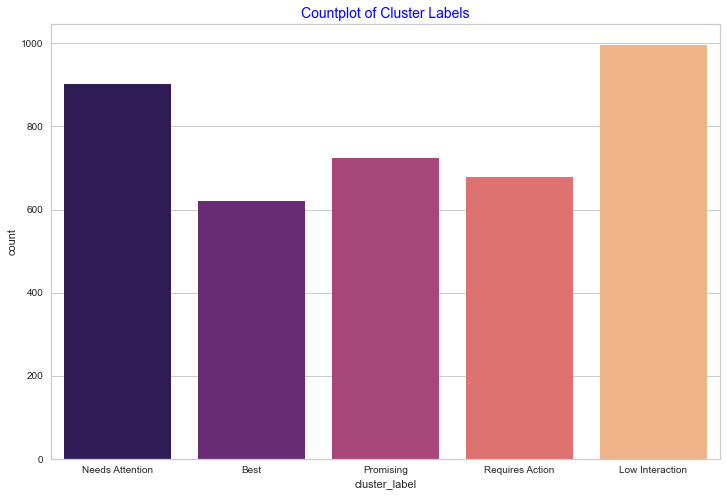

In [125]:
plt.figure(figsize=(12,8))
plt.title("Countplot of Cluster Labels", c="blue", size=14)
sns.countplot(rfm_scaled["cluster_label"], palette="magma");

**Conclusion**

- Cluster 0 : The first cluster belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=4), frequent buyers (F=4), and spent the most (M=4)

- Cluster 2 : These customers are also have low recency, high frequency and monetary purchase. They are not best customers but we can say that they are loyal and promising. 

- Cluster 4 : These customers doesn't come recently but they were coming before and company can lose them. Company should pay more attention these customers and why they don't come recently. 

- Cluster 1 :  clusters can be interpreted as passer customers as their last purchase is long ago (R<=1),purchased very few (F>=2 & F < 4) and spent little (M>=4 & M < 4).Company has to come up with new strategies to make them permanent members. Low value customers

- Cluster 0 : The last cluster is more related to the "Almost Lost" segment as they Haven’t purchased for some time(R=1), but used to purchase frequently and spent a lot.

### v. Conclusion

Discuss your final results. Compare your own labels from the Customer Segmentation with the labels found by K-Means.

Number of customers that rfm label and cluster label's equal: 2141
Number of customers that rfm label and cluster label's are not equal: 1780


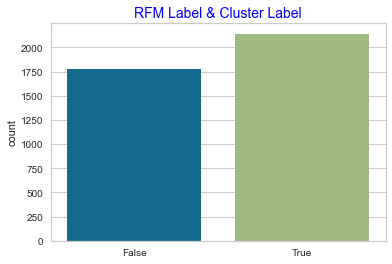

In [126]:
print("Number of customers that rfm label and cluster label's equal:", (df_rfm["rfm_level"] == rfm_scaled["cluster_label"]).sum())
print("Number of customers that rfm label and cluster label's are not equal:", (df_rfm["rfm_level"] != rfm_scaled["cluster_label"]).sum())

plt.title("RFM Label & Cluster Label", c="blue", size=14)
sns.countplot((df_rfm["rfm_level"] == rfm_scaled["cluster_label"]));

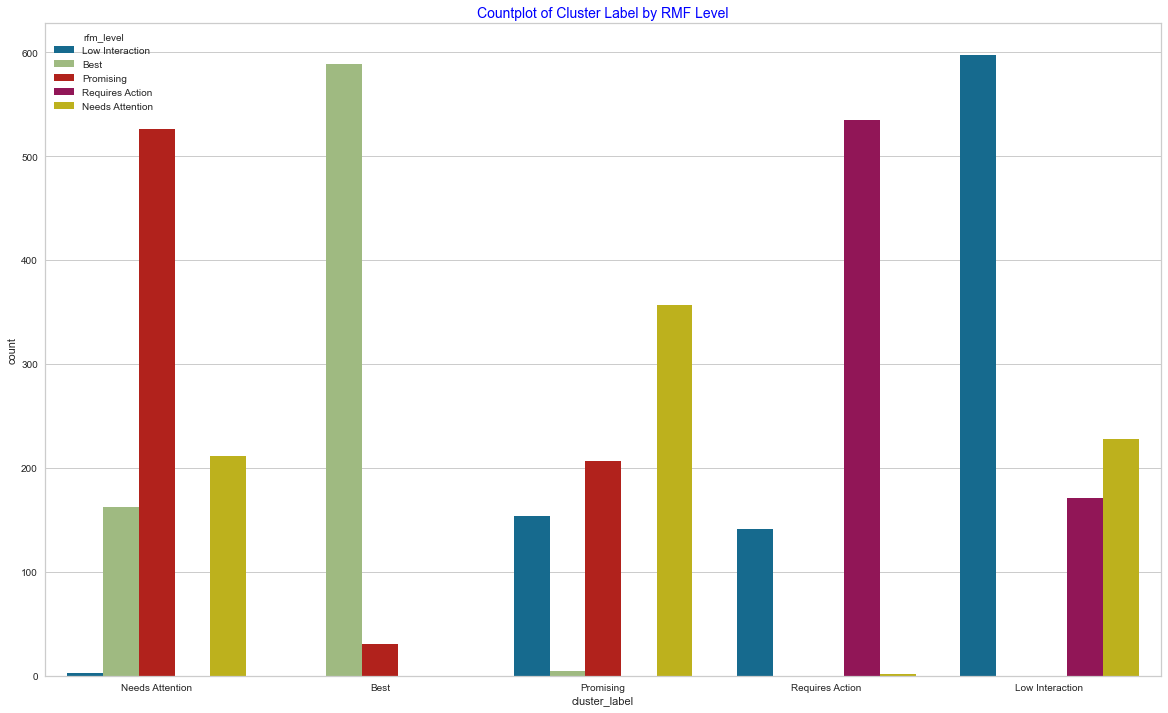

In [127]:
df_compare = pd.concat([df_rfm["rfm_level"], rfm_scaled["cluster_label"]], axis=1)

plt.figure(figsize=(20,12))
plt.title("Countplot of Cluster Label by RMF Level", c="blue", size=14)
sns.countplot(x="cluster_label", hue="rfm_level", data=df_compare);

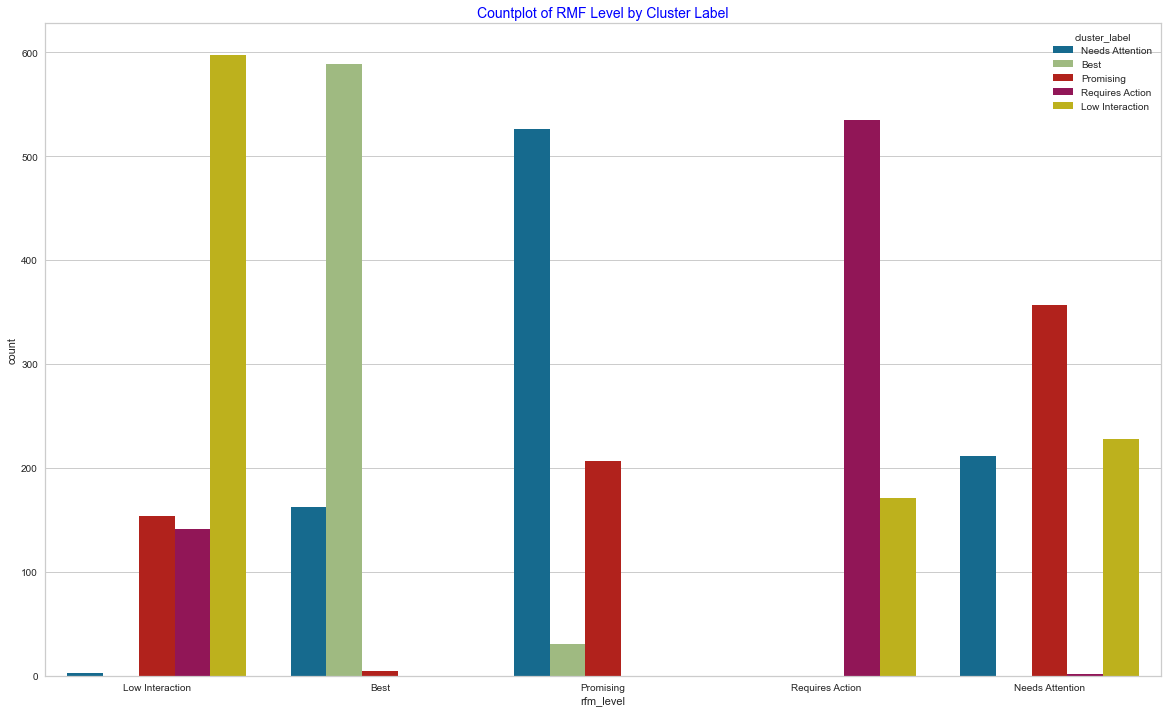

In [128]:
df_compare = pd.concat([df_rfm["rfm_level"], rfm_scaled["cluster_label"]], axis=1)

plt.figure(figsize=(20,12))
plt.title("Countplot of RMF Level by Cluster Label", c="blue", size=14)
sns.countplot(x="rfm_level", hue="cluster_label", data=df_compare);

From the above plot we can conclude that both method determine "Best" customers. However Kmeans gives less value for "Requires Action" cluster and predict most of the rfm_level's loyal label as promising label. 

# 5. Create Cohort & Conduct Cohort Analysis
[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

## Future Engineering

### i. Extract the Month of the Purchase
First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [129]:
def day_first(x):

  return dt.datetime(x.year, x.month, 1)

Now we will use the function created above to convert all the invoice dates into respective month date format.

In [130]:
df["InvoiceMonth"] = df["InvoiceDate"].apply(day_first)
df["InvoiceMonth"].head()

0   2010-12-01
1   2010-12-01
2   2010-12-01
3   2010-12-01
4   2010-12-01
Name: InvoiceMonth, dtype: datetime64[ns]

In [131]:
df["CohortMonth"] = df.groupby("CustomerID")["InvoiceMonth"].transform(min)
df["CohortMonth"].head()

0   2010-12-01
1   2010-12-01
2   2010-12-01
3   2010-12-01
4   2010-12-01
Name: CohortMonth, dtype: datetime64[ns]

### ii. Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, we will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date using the get_date_int() function which we'll create it below.

In [132]:
def get_date_int(x):
  
  y = x.dt.year
  m = x.dt.month
  d = x.dt.day
  return y, m, d

We will use this function to extract the integer values for Invoice as well as Cohort Date in 3 seperate series for each of the two columns

In [133]:
 inv_year, inv_month, inv_day = get_date_int(df["InvoiceMonth"])
 coh_year, coh_month, coh_day = get_date_int(df["CohortMonth"])

Use the variables created above to calculate the difference in days and store them in cohort Index column.

In [134]:
years_diff = inv_year - coh_year
months_diff = inv_month - coh_month

df['CohortIndex'] = years_diff * 12 + months_diff + 1 # Find retention for monthly 
df["CohortIndex"].describe()

count   397924.00
mean         5.15
std          3.85
min          1.00
25%          1.00
50%          4.00
75%          8.00
max         13.00
Name: CohortIndex, dtype: float64

## 1st Cohort: User number & Retention Rate

### i. Pivot Cohort and Cohort Retention

In [135]:
cohort_data = df.groupby(["CohortMonth", "CohortIndex"])["CustomerID"].nunique().reset_index() # Unique number of customers in cohort month and cohort index.
pivot_cohort = pd.pivot_table(data=cohort_data, index="CohortMonth", columns="CohortIndex", values="CustomerID") # creating pivot table
pivot_cohort.index = pivot_cohort.index.strftime('%Y-%m')
retention_rate = (pivot_cohort.divide(pivot_cohort.iloc[:,0], axis=0)).round(2) # retention rate

pivot_cohort

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,885.00,324.00,286.00,340.00,321.00,352.00,321.00,309.00,313.00,350.00,331.00,445.00,235.00
2011-01,417.00,92.00,111.00,96.00,134.00,120.00,103.00,101.00,125.00,136.00,152.00,49.00,nan
2011-02,380.00,71.00,71.00,108.00,103.00,94.00,96.00,106.00,94.00,116.00,26.00,nan,nan
2011-03,452.00,68.00,114.00,90.00,101.00,76.00,121.00,104.00,126.00,39.00,nan,nan,nan
2011-04,300.00,64.00,61.00,63.00,59.00,68.00,65.00,78.00,22.00,nan,nan,nan,nan
2011-05,284.00,54.00,49.00,49.00,59.00,66.00,75.00,27.00,nan,nan,nan,nan,nan
2011-06,242.00,42.00,38.00,64.00,56.00,81.00,23.00,nan,nan,nan,nan,nan,nan
2011-07,188.00,34.00,39.00,42.00,51.00,21.00,nan,nan,nan,nan,nan,nan,nan
2011-08,169.00,35.00,42.00,41.00,21.00,nan,nan,nan,nan,nan,nan,nan,nan


### ii. Visualize analysis of cohort 1 using seaborn and matplotlib modules

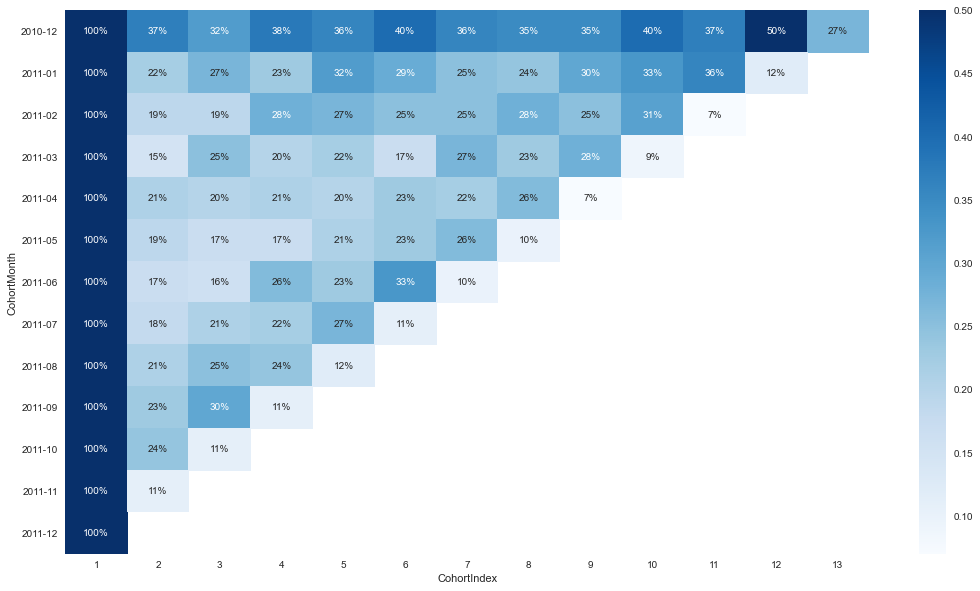

In [136]:
plt.figure(figsize=(18,10))
sns.heatmap(data=retention_rate, cmap="Blues", annot=True, fmt=".0%", vmax=0.5)
plt.yticks(rotation=0);

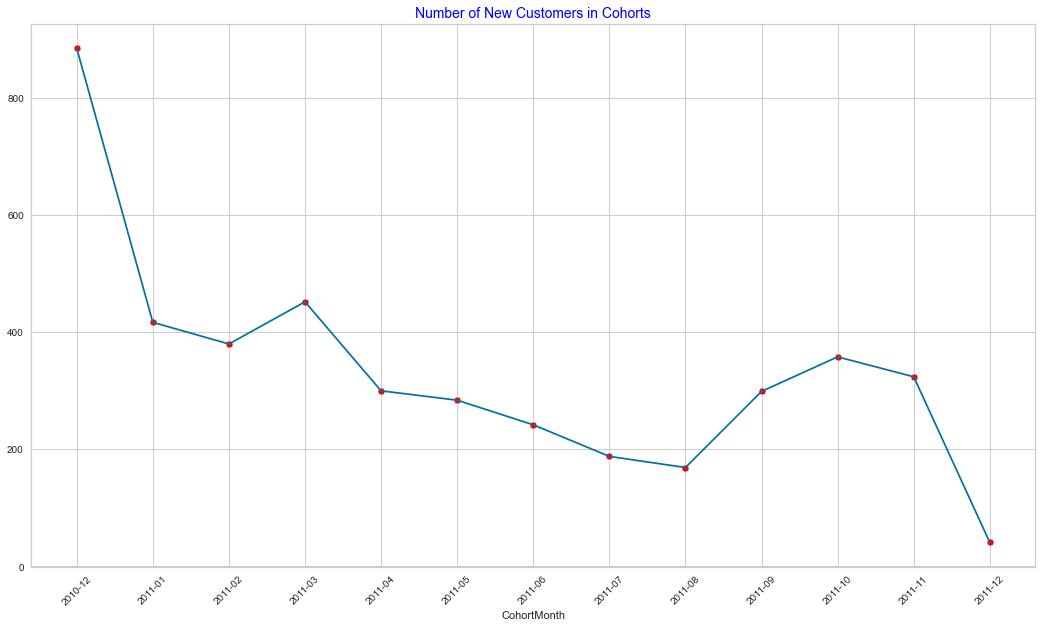

In [137]:
plt.figure(figsize=(18,10))
plt.title("Number of New Customers in Cohorts", c="blue", size=14)
sns.lineplot(x=pivot_cohort.iloc[:,0].index, y=pivot_cohort.iloc[:,0].values)
sns.scatterplot(x=pivot_cohort.iloc[:,0].index, y=pivot_cohort.iloc[:,0].values, sizes=50, color="red")
plt.xticks(rotation=45);

## 2nd Cohort: Average Quantity Sold

### i. Pivot Cohort and Cohort Retention

In [138]:
cohort_data = df.groupby(["CohortMonth", "CohortIndex"])["Quantity"].mean().reset_index() # Quantity mean for cohort month and cohort index
avg_quantity = pd.pivot_table(data=cohort_data, index="CohortMonth", columns="CohortIndex", values="Quantity") 
avg_quantity.index = avg_quantity.index.strftime('%Y-%m')

### ii. Visualize analysis of cohort 2 using seaborn and matplotlib modules

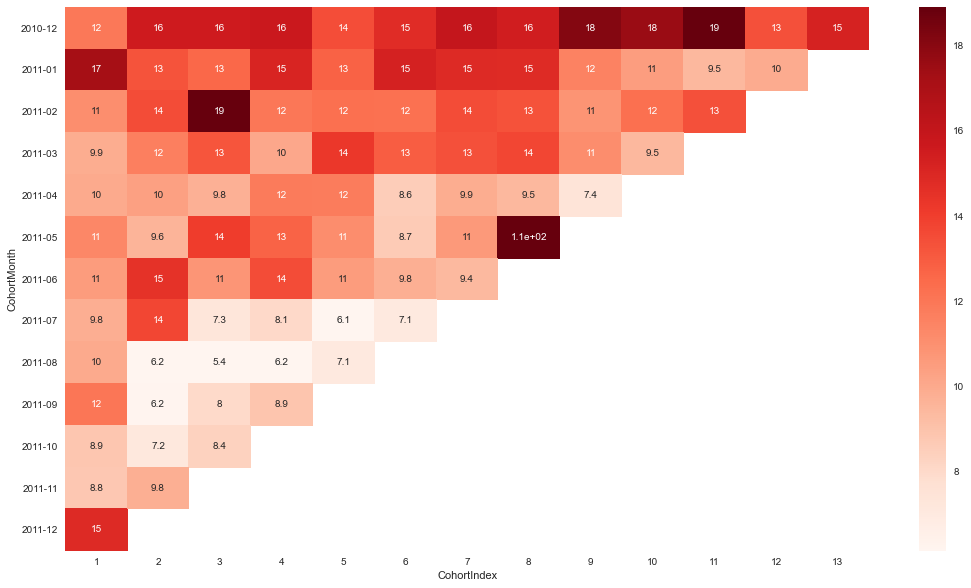

In [139]:
plt.figure(figsize=(18,10))
sns.heatmap(data=avg_quantity, cmap="Reds", annot=True, robust=True)
plt.yticks(rotation=0);

## 3rd Cohort: Average Sales


### i. Pivot Cohort and Cohort Retention

In [140]:
cohort_data = df.groupby(["CohortMonth", "CohortIndex"])["Cost"].mean().reset_index() # Cost mean for cohort month and cohort index
avg_sales = pd.pivot_table(data=cohort_data, index="CohortMonth", columns="CohortIndex", values="Cost")
avg_sales.index = avg_sales.index.strftime('%m-%Y')

### ii. Visualize analysis of cohort 3 using seaborn and matplotlib modules

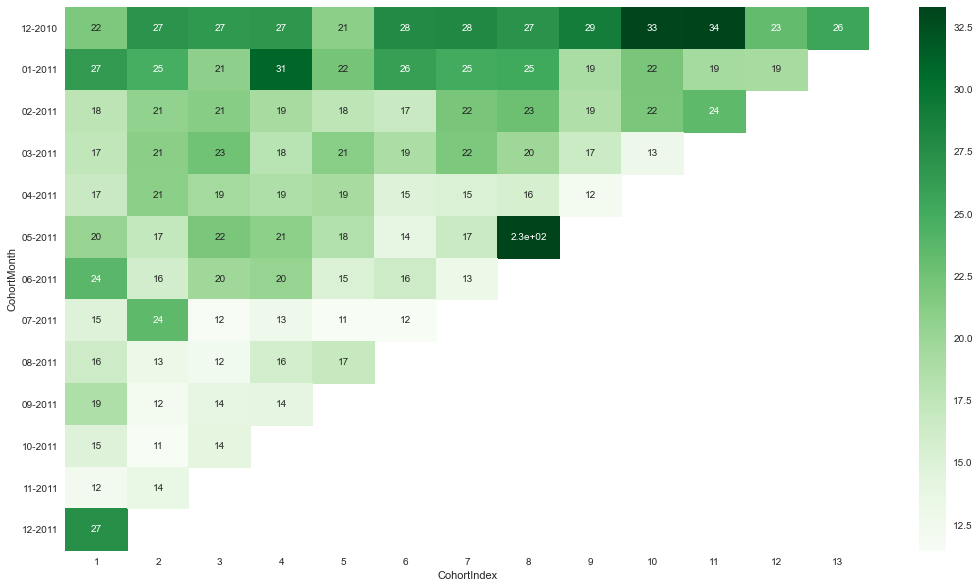

In [141]:
plt.figure(figsize=(18,10))
sns.heatmap(data=avg_sales, cmap="Greens", annot=True, robust=True)
plt.yticks(rotation=0);